In [1]:
import datetime
import pandas as pd
import datetime, time
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import math
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
from  sklearn.metrics import mean_absolute_error as mae
import pandas_ta as ta
warnings.filterwarnings('ignore')
import json


## Загрузка и предобработка данных

In [2]:
data = pd.read_excel('pfr.xlsx')

In [3]:
okved=pd.read_excel('Okved-2.xlsx')

In [4]:
okved=okved.drop('#', axis=1)

In [5]:

data_new=data.merge(okved, on='okved', how='left')

In [6]:

okved['okved']=okved['okved'].str.replace(' ', '')

In [7]:
# объединим таблицы с данными по категориям деятельности
data_new=data.merge(okved, on='okved', how='left')

In [8]:
data_new=data_new.rename(columns={'Название':'job'})

In [9]:
# исключим строки с общей информацией
data_upd=data_new.query('okved !="Total" and gender!="Total" and age !="Total"')

In [10]:
data_upd

region okved gender    age  jobs2017  jobs2018  jobs2019  \
83                  РФ    99      Ж  80-84  0.000000  0.000000  0.000000   
84                  РФ    99      Ж  75-79  0.003917  0.003083  0.000917   
85                  РФ    99      Ж  70-74  0.017167  0.016833  0.023417   
86                  РФ    99      Ж  65-69  0.084333  0.092167  0.094000   
87                  РФ    99      Ж  60-64  0.192083  0.168833  0.183250   
...                ...   ...    ...    ...       ...       ...       ...   
368849  Алтайский край     -      М  35-39  0.826667  0.883917  0.901250   
368850  Алтайский край     -      М  30-34  0.869917  0.898833  0.804583   
368851  Алтайский край     -      М  25-29  0.630167  0.583750  0.509833   
368852  Алтайский край     -      М  20-24  0.271833  0.269500  0.249750   
368853  Алтайский край     -      М  15-19  0.008417  0.013000  0.011333   

        jobs2020  jobs2021  jobs2022  ...   fot2020   fot2021   fot2022  \
83      0.000083  0.000083  0.000250  ...  0.000308  0.000006  0.000018   
84      0.002250  0.007333  0.004833  ...  0.001679  0.017527  0.015386   
85      0.025250  0.026000  0.019583  ...  0.050479  0.046372  0.029735   
86      0.083083  0.075417  0.082000  ...  0.126384  0.120506  0.143621   
87      0.186833  0.176500  0.151833  ...  0.311592  0.314846  0.259870   
...          ...       ...       ...  ...       ...       ...       ...   
368849  0.808333  0.977250  0.003917  ...  0.374975  0.549658  0.000862   
368850  0.705083  0.802583  0.007667  ...  0.312730  0.446094  0.003220   
368851  0.399250  0.456000  0.003667  ...  0.149500  0.230366  0.000445   
368852  0.228500  0.271000  0.004250  ...  0.058918  0.102115  0.001012   
368853  0.006083  0.022833  0.000250  ...  0.001056  0.005260  0.000069   

           salary2017     salary2018     salary2019     salary2020  \
83                  -              -              -         307632   
84       42473.727872   52090.267027   51429.443636   62189.685926   
85      112538.639417   118594.29599  141251.190036  166597.905974   
86      108907.491383  119902.589412  115834.601507  126764.756038   
87      111919.067432  124834.211318  129199.861301  138979.285856   
...               ...            ...            ...            ...   
368849   30092.022842   33241.802585    35383.85285   38657.209252   
368850   28625.755075   31676.714882   34013.267748   36961.353956   
368851   24886.956517   27892.983893   28997.124124    31204.32167   
368852   16181.298676   18478.797254   21038.345459   21487.321287   
368853        9776.81   12030.965128   13779.353162   14472.413836   

           salary2021     salary2022  \
83               5665    5836.666667   
84      199171.863295  265270.475172   
85      148627.961731  126530.192638   
86       133155.58095  145956.330894   
87      148652.365694  142628.870236   
...               ...            ...   
368849   46871.138852   18350.858511   
368850   46318.569338   35001.956957   
368851   42099.113695   10111.053864   
368852   31400.606903   19848.962941   
368853   19198.130839          22988   

                                                      job  
83      Деятельность экстерриториальных организаций и ...  
84      Деятельность экстерриториальных организаций и ...  
85      Деятельность экстерриториальных организаций и ...  
86      Деятельность экстерриториальных организаций и ...  
87      Деятельность экстерриториальных организаций и ...  
...                                                   ...  
368849                                                NaN  
368850                                                NaN  
368851                                                NaN  
368852                                                NaN  
368853                                                NaN  

[221740 rows x 23 columns]

In [11]:
# Дополним недостающие ОКВЭД
data_upd.loc[data_upd['okved'] == 67, 'job']='Вспомогательная деятельность в сфере финансового посредничества и страхования'
data_upd.loc[data_upd['okved'] == 34, 'job'] = 'Производство автомобилей, прицепов и полуприцепов'

**Проверим информацию в столбцах таблицы**

In [12]:
data_upd['region'].sort_values().unique()

array(['Алтайский край', 'Амурская обл.', 'Архангельская обл.',
       'Астраханская обл.', 'Байконур', 'Белгородская обл.',
       'Брянская обл.', 'Владимирская обл.', 'Волгоградская обл.',
       'Вологодская обл.', 'Воронежская обл.', 'Еврейская а.о.',
       'Забайкальский край', 'Ивановская обл.', 'Иркутская обл.',
       'Кабардино-Балкарская Респ.', 'Калининградская обл.',
       'Калужская обл.', 'Камчатский край', 'Карачаево-Черкесская Респ.',
       'Кемеровская обл.', 'Кировская обл.', 'Костромская обл.',
       'Краснодарский край', 'Красноярский край', 'Курганская обл.',
       'Курская обл.', 'Ленинградская обл.', 'Липецкая обл.',
       'Магаданская обл.', 'Московская обл.', 'Мурманская обл.',
       'Ненецкий а.о.', 'Нижегородская обл.', 'Новгородская обл.',
       'Новосибирская обл.', 'Омская обл.', 'Оренбургская обл.',
       'Орловская обл.', 'Пензенская обл.', 'Пермский край',
       'Приморский край', 'Псковская обл.', 'РФ', 'Респ. Адыгея',
       'Респ. Алтай', 

In [13]:
# заполним пропуски в столбце регионы
data_upd['region']=data_upd['region'].fillna(0)

In [14]:
# проверим данные в столбце ОКВЭД
data_upd['okved'].sort_values().unique()

array(['-', '.', '.6', '0', '00', '01', '02', '03', '04', '05', '06',
       '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '40', '41', '42', '43', '45', '46', '47', '49', '50', '51', '52',
       '53', '54', '55', '56', '58', '59', '60', '61', '62', '63', '64',
       '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75',
       '77', '78', '79', '80', '81', '82', '84', '85', '86', '87', '88',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99'],
      dtype=object)

In [15]:
# Проверим данные в столбце возраст
data_upd['age'].sort_values().unique()

array(['00-04', '05-09', '10-14', '15-19', '20-24', '25-29', '30-34',
       '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
       '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '>=100'],
      dtype=object)

In [16]:
# Заменим прочерки на пропуски
data_upd.replace("-", np.nan, inplace=True)

In [17]:
# приведем зарплату к числовому формату данных
data_upd[['salary2017', 'salary2018', 'salary2019', 'salary2020', 'salary2021', 'salary2022']]=\
data_upd[['salary2017', 'salary2018', 'salary2019', 'salary2020', 'salary2021', 'salary2022']].apply(pd.to_numeric)

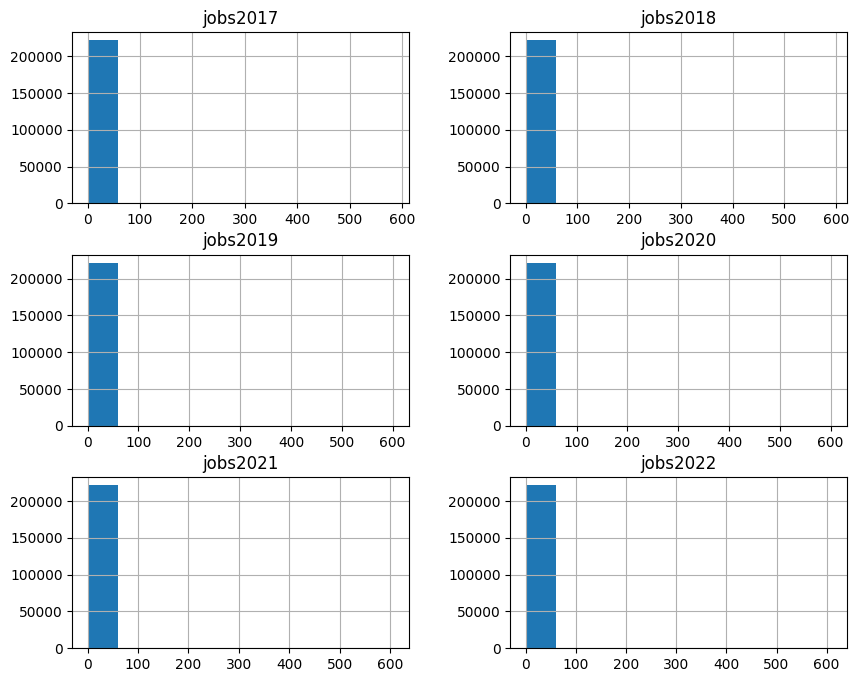

In [18]:
# рассмотрим распределение количества рабочих мест
data_upd[['jobs2017', 'jobs2018', 'jobs2019', 'jobs2020', 'jobs2021', 'jobs2022']].hist(figsize=(10,8))
plt.show()

В данных по количеству рабочих мест есть выбросы, основной объем выборки укаладывается в диапозон до 50 тыс.

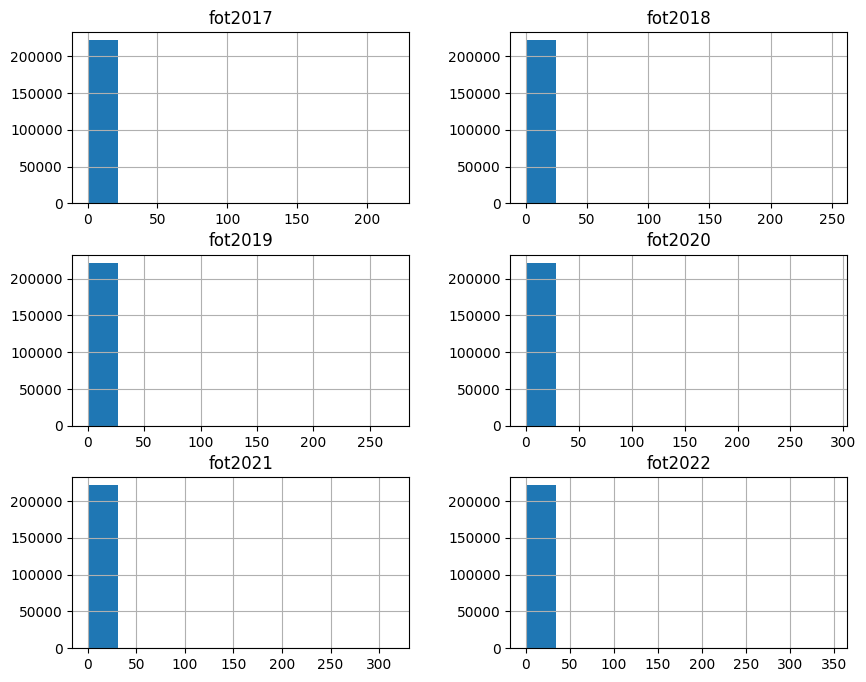

In [19]:
# рассмотрим распределение фонда оплаты труда
data_upd[['fot2017', 'fot2018', 'fot2019', 'fot2020', 'fot2021', 'fot2022']].hist(figsize=(10,8))
plt.show()

В данных по фонду оплаты труда есть выбросы, основной объем выборки укладывается до 25-30 млрд. рублей

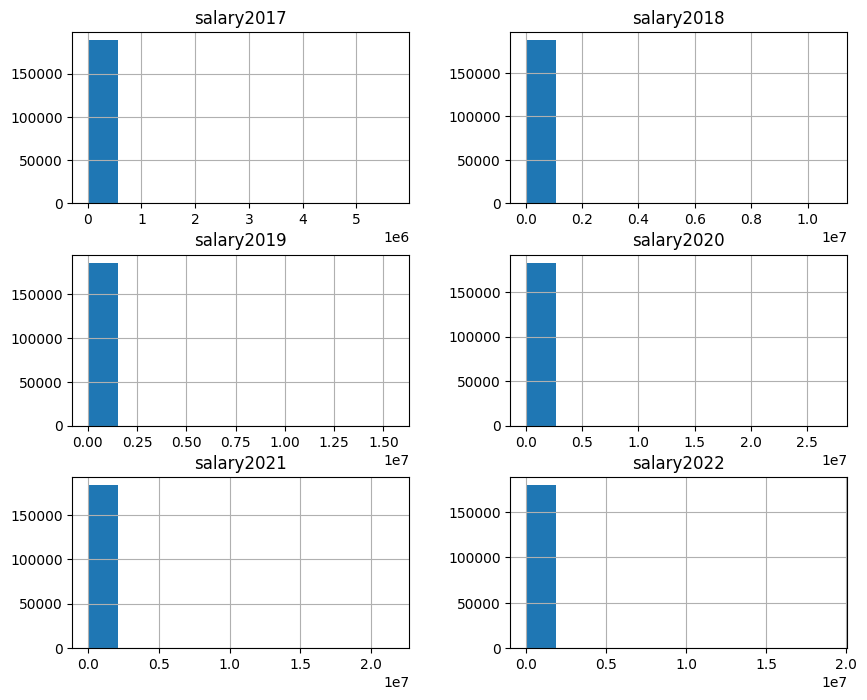

In [20]:
# рассмотрим распределение зарплаты
data_upd[['salary2017', 'salary2018', 'salary2019', 'salary2020', 'salary2021', 'salary2022']].hist(figsize=(10,8)) 
plt.show()

В данных по зарплате есть выбросы, основной объем выборки уклаывается до 1 млн. рублей

Зададим функции для группировки данных

In [21]:
# функция для определения среднего количества рабочих мест для различных групп
def grouped_jobs(group):
    grouped=data_upd.groupby(group)[['jobs2017', 'jobs2018', 'jobs2019', 'jobs2020', 'jobs2021', 'jobs2022']].mean()
    return grouped

In [22]:
# функция для определения среднего фонда оплаты труда для различных групп
def grouped_fot(group):
    grouped=data_upd.groupby(group)[['fot2017', 'fot2018', 'fot2019', 'fot2020', 'fot2021', 'fot2022']].mean()
    return grouped

In [23]:
# функция для определения медианной зарплаты для различных групп
def grouped_salary(group):
    grouped=data_upd.groupby(group)[['salary2017', 'salary2018', 'salary2019', 'salary2020', 'salary2021', 'salary2022']].median()
    return grouped

In [27]:
# функция для классификации различных категорий деятельности
def categorize_job(job):
    if pd.isna(job):
        return 'Неопределено'
    job_lower = job.lower()
    
    if any(word in job_lower for word in ['образование', 'школа', 'университет', 'педагог']):
        return 'Образование'
    elif any(word in job_lower for word in ['здравоохранение', 'медицина', 'больница', 'медицинский', 'здравоохранения', 'ветеринарная']):
        return 'Здравоохранение'
    elif any(word in job_lower for word in ['социальные услуги', 'социальная помощь', 'уход', 'общественных организаций', 'социальных услуг',\
                                           'уходу с обеспечением проживания', 'временного проживания', 'страхование']):
        return 'Социальные услуги'
    elif any(word in job_lower for word in ['государственное управление', 'государственная служба', 'обеспечение безопасности', 'безопасности', 'военная', 'военной']):
        return 'Государственное управление и безопасность'
    elif any(word in job_lower for word in ['искусство', 'культура', 'развлечения', 'музей', 'библиотека', 'издательская']):
        return 'Культура и развлечения'
    elif any(word in job_lower for word in ['растениеводство', 'животноводство', 'сельское хозяйство', 'охота', 'рыболовство', 'лесоводство']):
        return 'Сельское хозяйство'
    elif any(word in job_lower for word in ['торговля', 'магазин', 'супермаркет']):
        return 'Торговля'
    elif any(word in job_lower for word in ['ремонт', 'сервис']):
        return 'Ремонт'
    elif any(word in job_lower for word in ['строительство', 'архитектура', 'инженер', 'архитектуры', 'строительные', 'обслуживанию зданий и территорий'\
                                           ]):
        return 'Строительство'
    elif any(word in job_lower for word in ['производство', 'завод', 'фабрика', 'добыча', 'полезных ископаемых']):
        return 'Производство и добыча'
    elif any(word in job_lower for word in ['спорт', 'отдых', 'туризм']):
        return 'Спорт и отдых'
    elif any(word in job_lower for word in ['логистика', 'склад']):
        return 'Логистика'
    elif any(word in job_lower for word in ['недвижимость', 'операции с недвижимостью', 'недвижимым имуществом']):
        return 'Недвижимость'
    elif any(word in job_lower for word in ['культура', 'музей', 'библиотек', 'архив', 'творческая']):
        return 'Культура и архивы'
    elif any(word in job_lower for word in ['электрическая энергия', 'газ', 'пар', 'кондиционирование воздуха']):
        return 'Энергетика'
    elif any(word in job_lower for word in ['исследования и разработки', 'профессиональная научная']):
        return 'Наука'
    elif any(word in job_lower for word in ['продуктов питания']):
        return 'Общепит'
    elif any(word in job_lower for word in ['финансовых услуг', 'бухгалтерского учета', 'лизинг']):
        return 'Финансы'
    elif any(word in job_lower for word in ['информационных технологий', 'программного обеспечения']):
        return 'Информационные технологие'
    elif any(word in job_lower for word in ['рекламная', 'телекоммуникаций', 'телевизионного']):
        return 'Реклама и ТВ'
    elif any(word in job_lower for word in ['очистка', 'утилизация', 'сточных вод', 'удалением отходов']):
        return 'Утилизация'
    elif any(word in job_lower for word in ['курьерская деятельность']):
        return 'Курьеры'
        
        
        
    else:
        return 'Прочее'


In [28]:
data_upd['category'] =data_upd['job'].apply(categorize_job)

## Анализ данных по возрастным группам

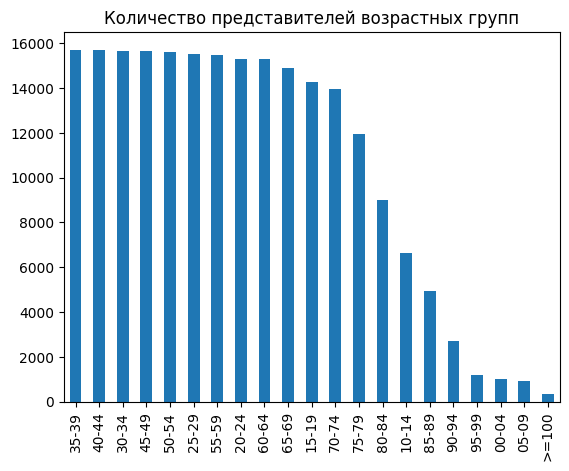

In [31]:
# рассмотрим распределение возрастных групп
data_upd.groupby('age')['age'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Количество представителей возрастных групп')
plt.xlabel('')
plt.show()

- В возрастных группах от 15 до 74 лет данные распределены равномерно, в каждой группе около 16 тысяч представителей. 
- В возрастных группах после 74 лет снижается число работающего населения, эти данные, скорее всего, в основном, отражают социальные выплаты
- Представленные данные по группам от 0 до 14 лет, скорее всего, отражают социальные выплаты

In [32]:
# группировка данных по возрасту
age_jobs=grouped_jobs('age')

In [33]:
def grouped_age(table):
    table_25_54=table.query('age=="25-29" or age=="30-34" or age =="35-39" or age=="40-44" or age=="45-49" or age=="50-54"')
    table_55_69=table.query('age =="55-59" or age =="60-64" or age =="65-69"')
    table_70_100=table.query('age=="70-74" or age=="75-79" or age=="80-84" or age =="85-89" or age =="90-94" or age =="95-99" or age==">=100"')
    table_0_24=table.query('age=="00-04" or age=="05-09" or age=="10-14" or age =="15-19" or age=="20-24"')
    return table_25_54, table_55_69, table_70_100, table_0_24

In [34]:
age_jobs_25_54, age_jobs_55_69, age_jobs_70_100, age_jobs_0_24=grouped_age(age_jobs)

In [36]:
# функция для отрисовки графиков
def change_plot(table, ratio, suptitle):
    fig =plt.figure(figsize = (16,8))
    colors = sns.color_palette("tab10", n_colors=len(table.index))
    ax1=fig.add_subplot(1,2,1)
    ax1=table.T.plot(color=colors, label=age_jobs.index, ax=ax1)
    ax2=fig.add_subplot(1,2,2)
    ax2=ratio.T.plot(color=colors, label=age_jobs.index, ax=ax2)
    plt.suptitle(suptitle)

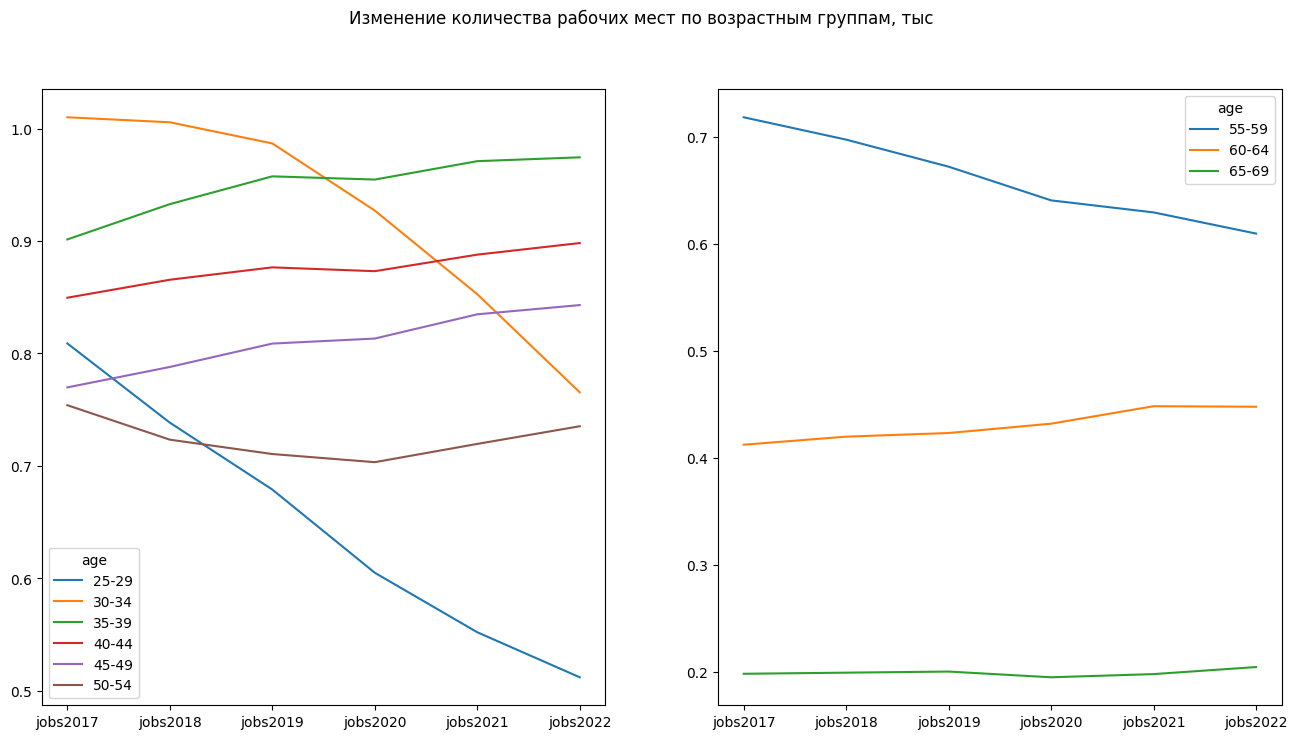

In [37]:
change_plot(age_jobs_25_54, age_jobs_55_69, 'Изменение количества рабочих мест по возрастным группам, тыс')

- в возрастных группах 35-39, 40-44, 45-49, 50-54 наиболее высокое среднее количество рабочих мест, что соответствует наиболее опытному и активному трудоспособному населению
- в возрастных группах 30-34, 25-29 снижается среднее количество рабочих мест, что свидетельствует о снижении занятности у молодых и начинающих специалистов
- в группах от 55 до 69 лет наиболее высокое среднее количество рабочих мест в группе 55-59, число снижается с 2017 по 2022, что свидетельствует о снижении занятости в предпенсионном возрасте

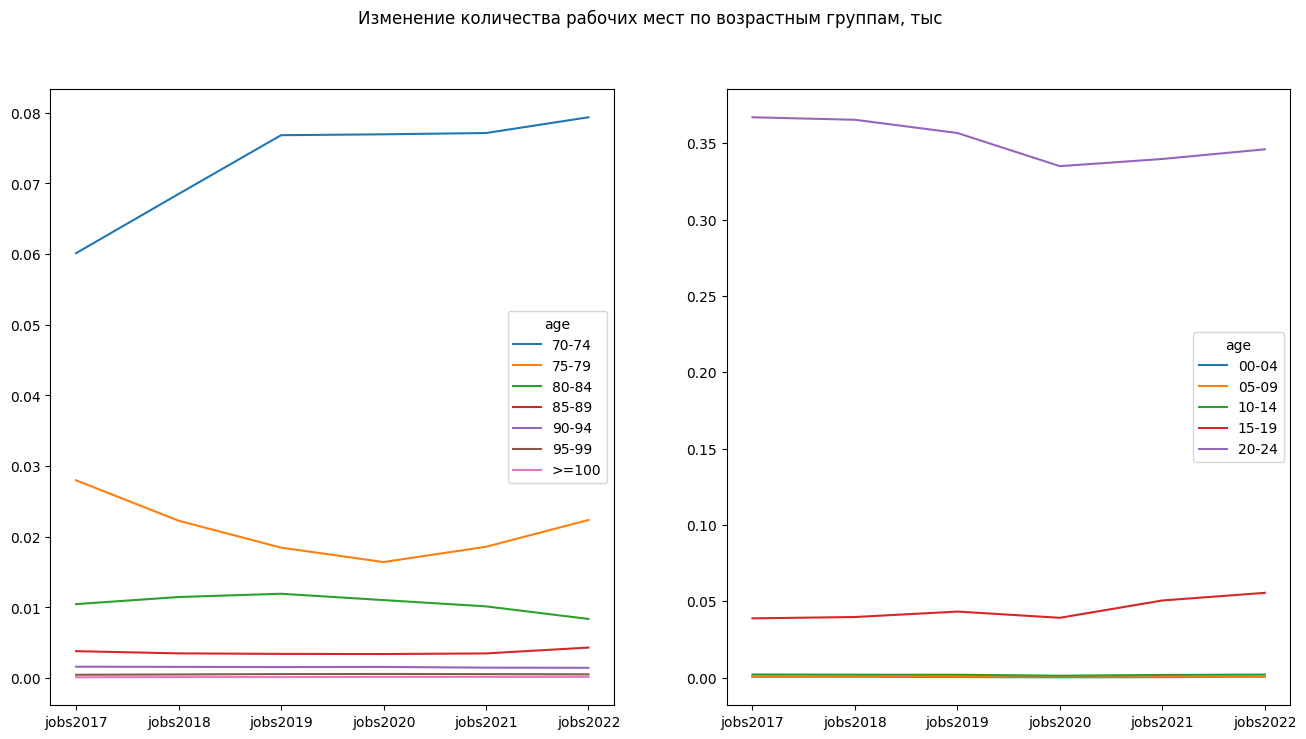

In [38]:
change_plot(age_jobs_70_100, age_jobs_0_24, 'Изменение количества рабочих мест по возрастным группам, тыс')

- среднее число рабочих мест в возрастных группах от 70 лет значительно ниже, только группа 70-74 лет имеет отличающиеся от нуля значения
- в группах до 24 лет только группа 20-24 лет имеет отличающиеся от близких к нулю данные, среднее количество рабочих мест в этой группе немного снижается

In [39]:
age_fot=grouped_fot('age')

In [40]:
age_fot_25_54, age_fot_55_69, age_fot_70_100, age_fot_0_24=grouped_age(age_fot)

In [41]:
fot_change_25_24 = (age_fot_25_54.sub(age_fot_25_54['fot2017'], axis=0)).div(age_fot_25_54['fot2017'], axis=0)
fot_change_55_69 = (age_fot_55_69.sub(age_fot_55_69['fot2017'], axis=0)).div(age_fot_55_69['fot2017'], axis=0)
fot_change_70_100 = (age_fot_70_100.sub(age_fot_70_100['fot2017'], axis=0)).div(age_fot_70_100['fot2017'], axis=0)
fot_change_0_24 = (age_fot_0_24.sub(age_fot_0_24['fot2017'], axis=0)).div(age_fot_0_24['fot2017'], axis=0)

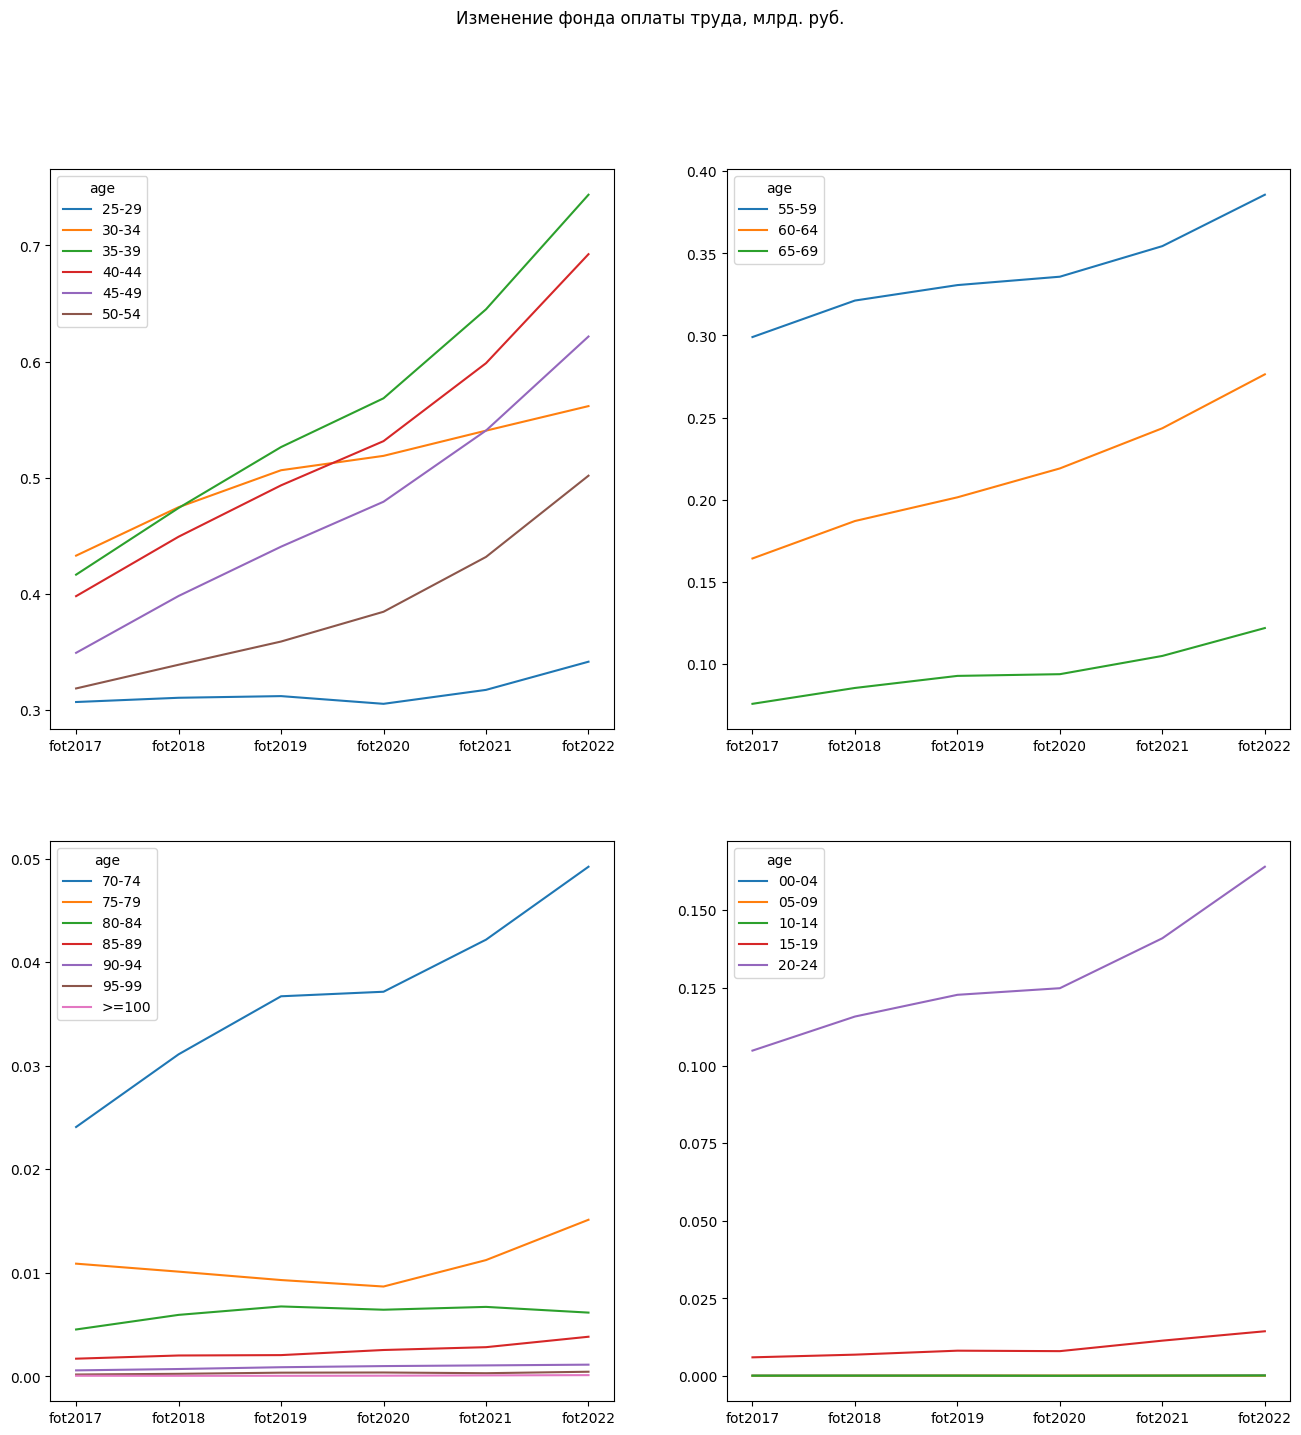

In [45]:
fig =plt.figure(figsize = (16,16))
ax1=fig.add_subplot(2,2,1)
ax1=age_fot_25_54.T.plot(label=age_fot_25_54.index, ax=ax1)
ax2=fig.add_subplot(2,2,2)
ax2=age_fot_55_69.T.plot(label=age_fot_55_69.index, ax=ax2)
ax3=fig.add_subplot(2,2,3)
ax3=age_fot_70_100.T.plot(label=age_fot_70_100.index, ax=ax3)
ax4=fig.add_subplot(2,2,4)
ax4=age_fot_0_24.T.plot(label=age_fot_0_24.index, ax=ax4)
plt.suptitle('Изменение фонда оплаты труда, млрд. руб.')
plt.show()

- Наиболее высокий ФОТ в возрастных группах от 30 до 54 лет
- во всех возрастных группах наблюдается рост ФОТ
- в группах от 70 лет только в группе 70-74 лет среднее значение ФОТ имеет отличное от нуля значения
- в группах до 24 лет только в группе 20-24 лет среднее значение ФОТ имеет отличное от нуля значения

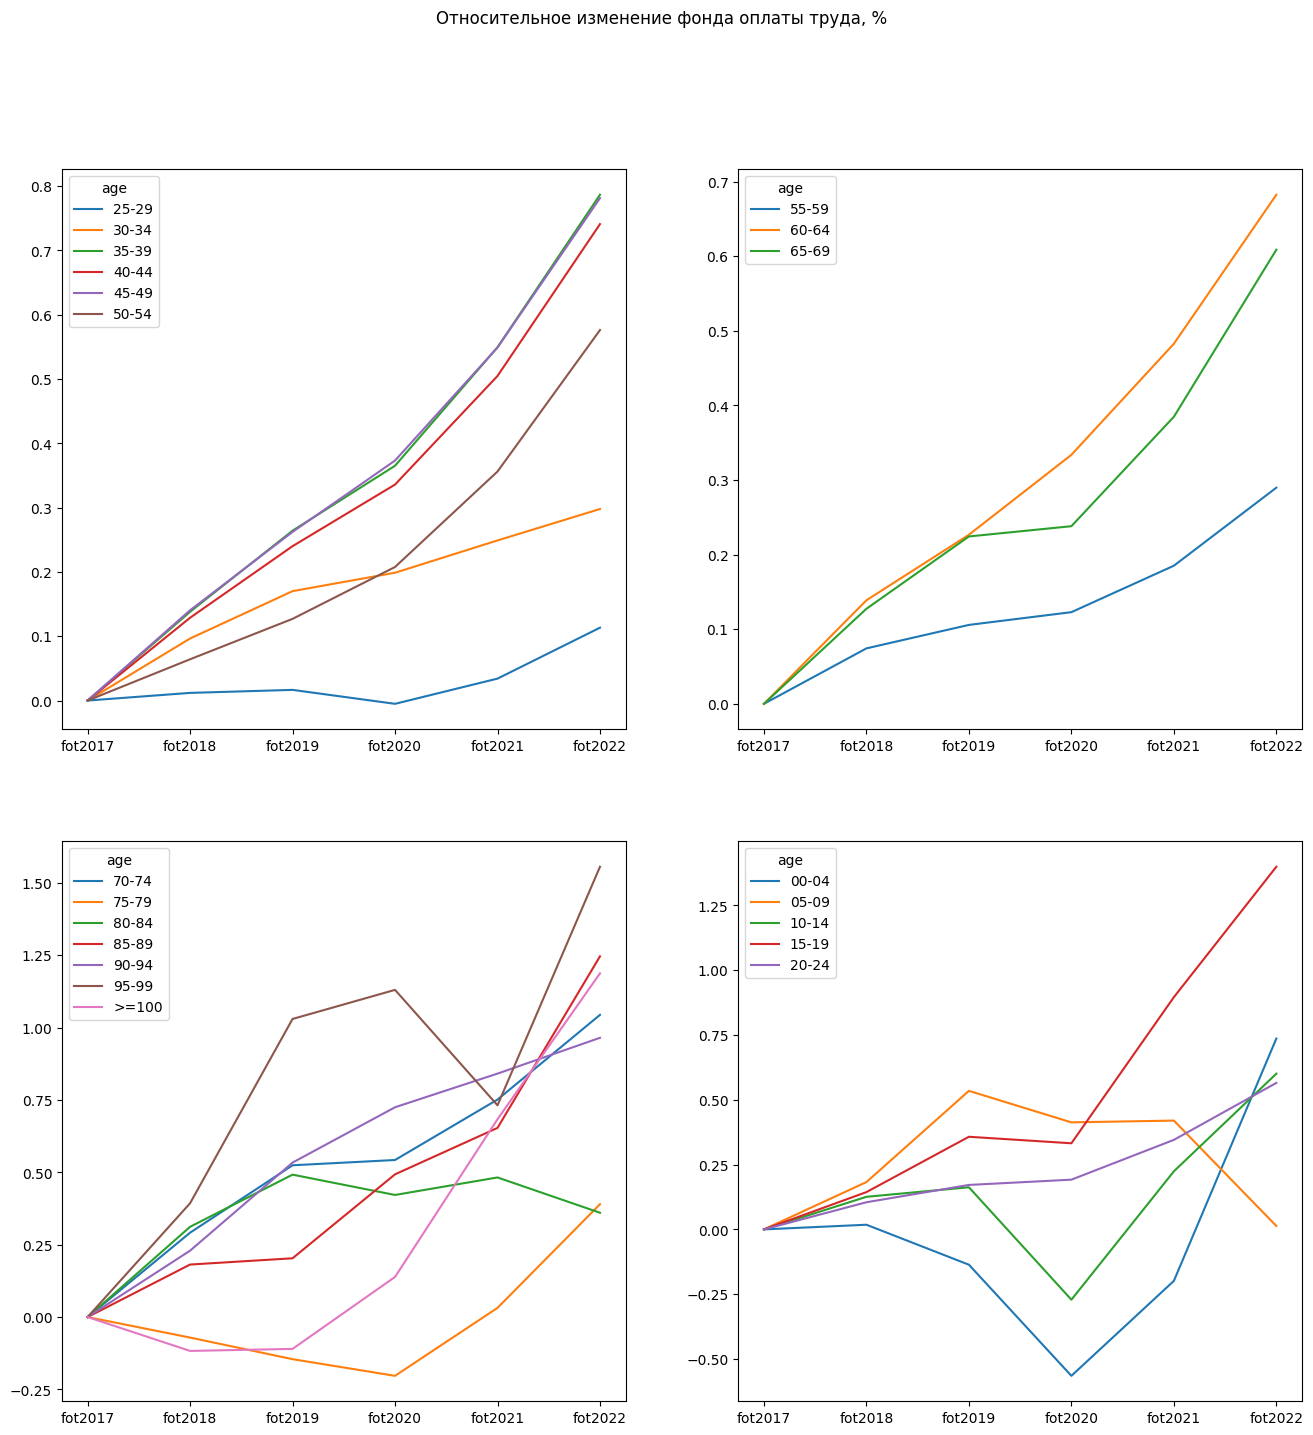

In [47]:
fig =plt.figure(figsize = (16,16))
ax1=fig.add_subplot(2,2,1)
ax1=fot_change_25_24.T.plot(label=age_fot_25_54.index, ax=ax1)
ax2=fig.add_subplot(2,2,2)
ax2=fot_change_55_69.T.plot(label=age_fot_55_69.index, ax=ax2)
ax3=fig.add_subplot(2,2,3)
ax3=fot_change_70_100.T.plot(label=age_fot_70_100.index, ax=ax3)
ax4=fig.add_subplot(2,2,4)
ax4=fot_change_0_24.T.plot(label=age_fot_0_24.index, ax=ax4)
plt.suptitle('Относительное изменение фонда оплаты труда, %')
plt.show()

Возрастная группа 25-54:

- Для всех возрастных групп в диапазоне от 25 до 54 лет наблюдается стабильный рост фонда оплаты труда с 2017 по 2022 год.
- Наибольший рост отмечается у возрастной группы 35-39 и 45-49 лет, особенно начиная с 2020 года

Возрастная группа 55-69:

- Возрастные группы 55-59 и 60-64 лет демонстрируют устойчивый рост, особенно после 2020 года.
- Возрастная группа 65-69 лет также показывает рост, но с некоторыми колебаниями в промежуточные годы.

Возрастная группа 70-100:
- Возрастные группы 70-74 и 75-79 лет демонстрируют значительный рост, хотя и с колебаниями
- В остальных группах данные колеблются, что связано с небольшой выборкой в этих возрастных категориях

Возрастная группа 0-24:
- Возрастные группы 15-19 и 20-24 лет демонстрируют устойчивый рост, особенно после 2020 года
- В остальных группах данные колеблются, что связано с небольшой выборкой в этих возрастных категориях

In [48]:
# группировка данных о зарплате по возрасту
age_salary=grouped_salary('age')

In [49]:
age_salary_25_54, age_salary_55_69, age_salary_70_100, age_salary_0_24=grouped_age(age_salary)

In [50]:
# расчет относительного изменения зарплат
salary_change_25_24 = (age_salary_25_54.sub(age_salary_25_54['salary2017'], axis=0)).div(age_salary_25_54['salary2017'], axis=0)
salary_change_55_69 = (age_salary_55_69.sub(age_salary_55_69['salary2017'], axis=0)).div(age_salary_55_69['salary2017'], axis=0)
salary_change_70_100 = (age_salary_70_100.sub(age_salary_70_100['salary2017'], axis=0)).div(age_salary_70_100['salary2017'], axis=0)
salary_change_0_24 = (age_salary_0_24.sub(age_salary_0_24['salary2017'], axis=0)).div(age_salary_0_24['salary2017'], axis=0)

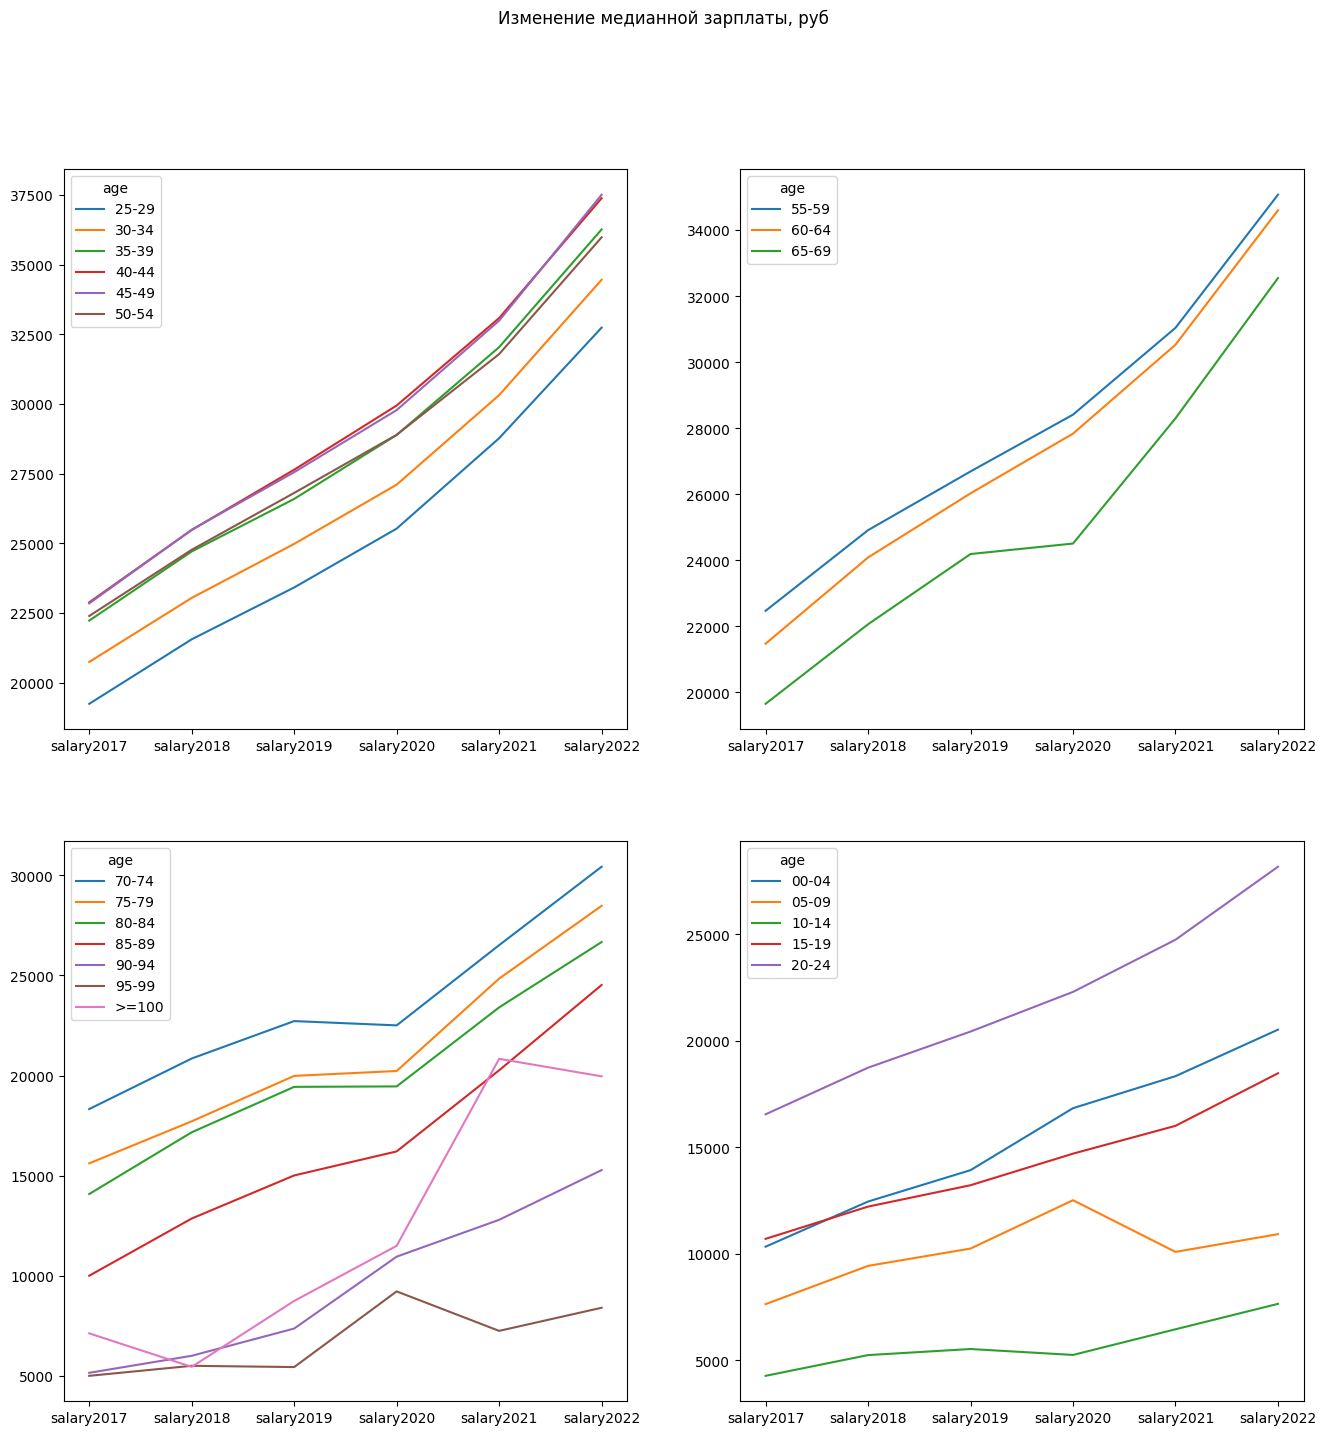

In [53]:
fig =plt.figure(figsize = (16,16))
ax1=fig.add_subplot(2,2,1)
ax1=age_salary_25_54.T.plot(label=age_salary_25_54.index, ax=ax1)
ax2=fig.add_subplot(2,2,2)
ax2=age_salary_55_69.T.plot(label=age_salary_55_69.index, ax=ax2)
ax3=fig.add_subplot(2,2,3)
ax3=age_salary_70_100.T.plot(label=age_salary_70_100.index, ax=ax3)
ax4=fig.add_subplot(2,2,4)
ax4=age_salary_0_24.T.plot(label=age_salary_0_24.index, ax=ax4)
plt.suptitle('Изменение медианной зарплаты, руб')
plt.show()

- во всех возрастных группах медианная зарплата демонстрирует рост
- наиболее высокая медианная зарплата в возрастных группах 40-44 и 45-49 лет, что соответствует более опытным специалистам


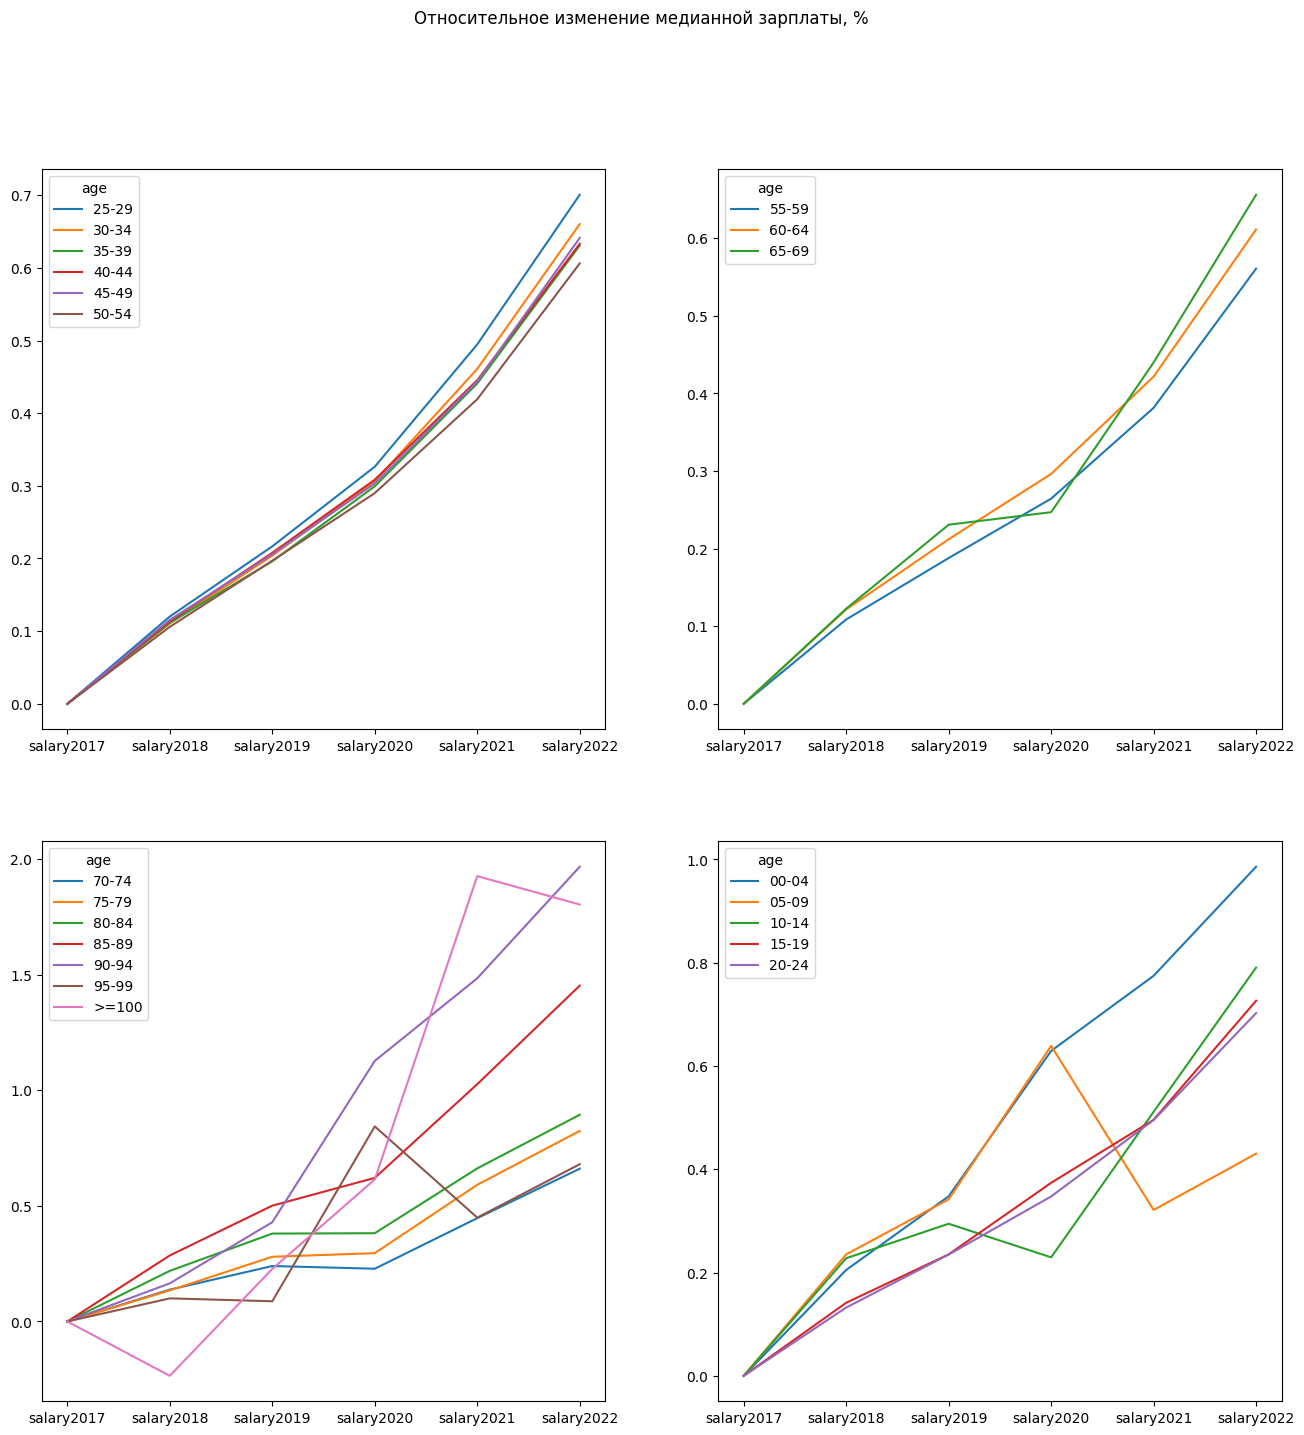

In [54]:
fig =plt.figure(figsize = (16,16))
ax1=fig.add_subplot(2,2,1)
ax1=salary_change_25_24.T.plot(label=age_salary_25_54.index, ax=ax1)
ax2=fig.add_subplot(2,2,2)
ax2=salary_change_55_69.T.plot(label=age_salary_55_69.index, ax=ax2)
ax3=fig.add_subplot(2,2,3)
ax3=salary_change_70_100.T.plot(label=age_salary_70_100.index, ax=ax3)
ax4=fig.add_subplot(2,2,4)
ax4=salary_change_0_24.T.plot(label=age_salary_0_24.index, ax=ax4)
plt.suptitle('Относительное изменение медианной зарплаты, %')
plt.show()

- для активного работоспособного населения в возрасте от 25 до 69 лет наблюдается стабильный рост зарплаты около 70% относительно 2017 года
- возрастные группы 75-79 и старше показывают рост, но с более значительными колебаниями, что может быть связано с нестабильностью доходов в этих возрастных категориях или с меньшим числом выборки
- все возрастные группы в диапазоне от 0 до 24 лет демонстрируют значительные колебания, особенно возрастные группы 10-14 и 15-19 лет

In [55]:
age_25_54=age_salary_25_54.index
age_55_69=age_salary_55_69.index
age_70_100=age_salary_70_100.index
age_0_24=age_salary_0_24.index

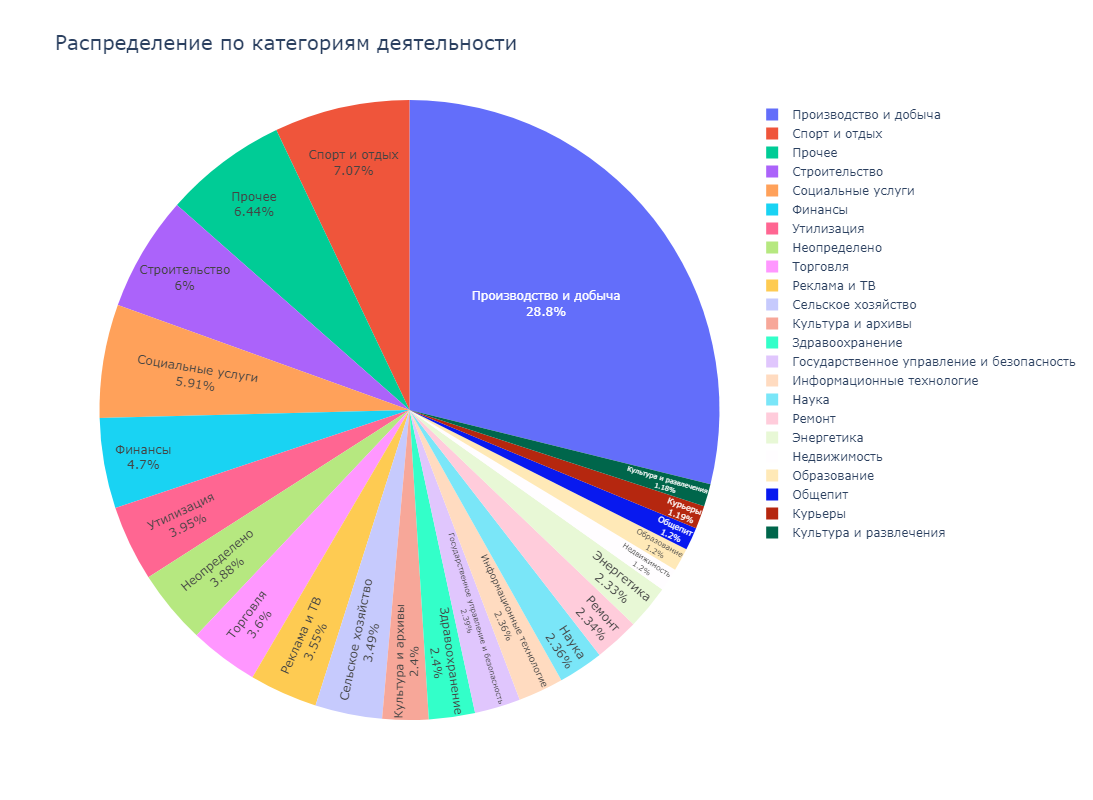

In [58]:
# распределение по категориям деятельности для возрастных групп от 25 до 54 лет
category_counts = data_upd.query('age in @age_25_54')['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# Create pie chart using Plotly
fig = px.pie(category_counts, values='count', names='category', title='Распределение по категориям деятельности', 
             hover_data=['count'], labels={'count':'Count'})

# Customize text position and angle
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(width=1000, height=800, title_font_size=20)
# Show plot
fig.show()

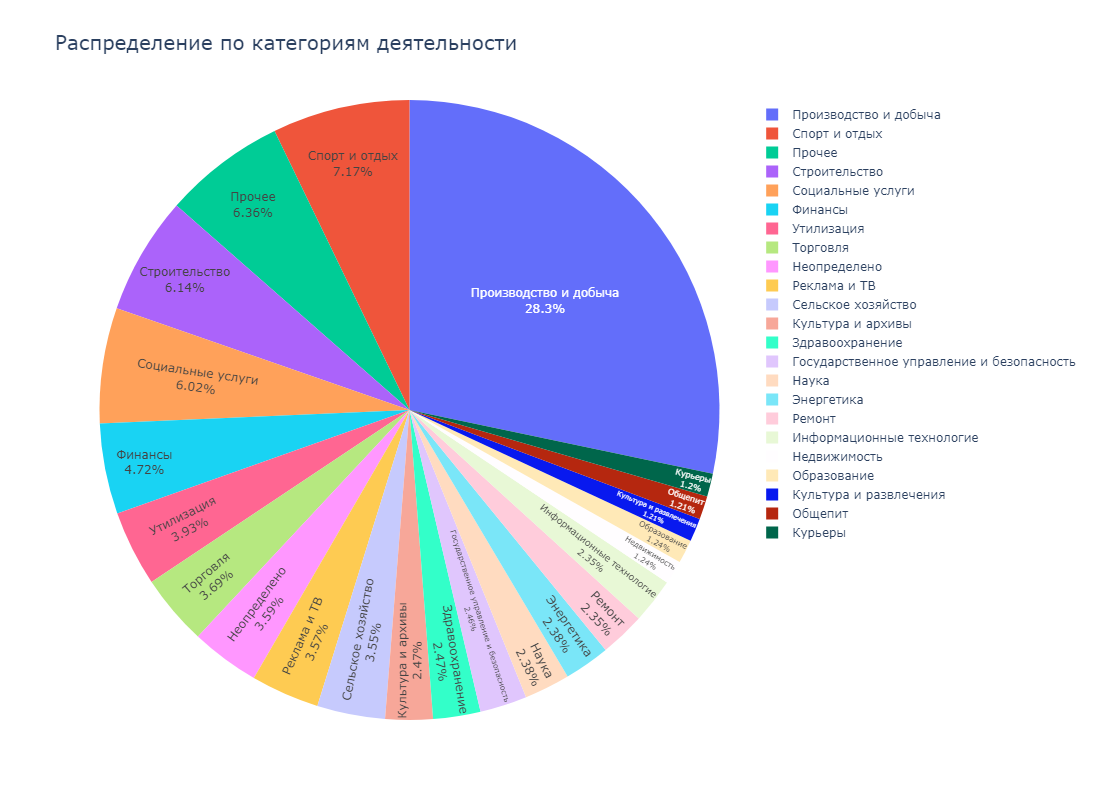

In [59]:
category_counts = data_upd.query('age in @age_55_69')['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# Create pie chart using Plotly
fig = px.pie(category_counts, values='count', names='category', title='Распределение по категориям деятельности', 
             hover_data=['count'], labels={'count':'Count'})

# Customize text position and angle
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(width=1000, height=800, title_font_size=20)
# Show plot
fig.show()

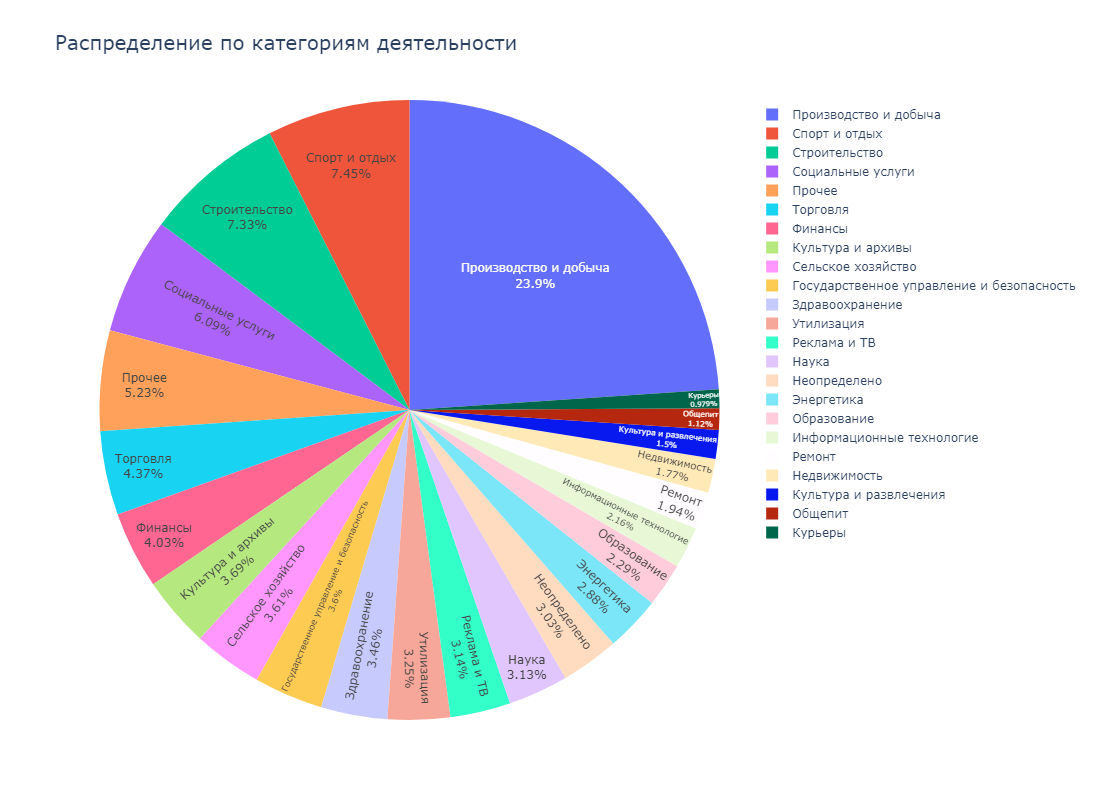

In [60]:
category_counts = data_upd.query('age in @age_70_100')['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# Create pie chart using Plotly
fig = px.pie(category_counts, values='count', names='category', title='Распределение по категориям деятельности', 
             hover_data=['count'], labels={'count':'Count'})

# Customize text position and angle
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(width=1000, height=800, title_font_size=20)
# Show plot
fig.show()

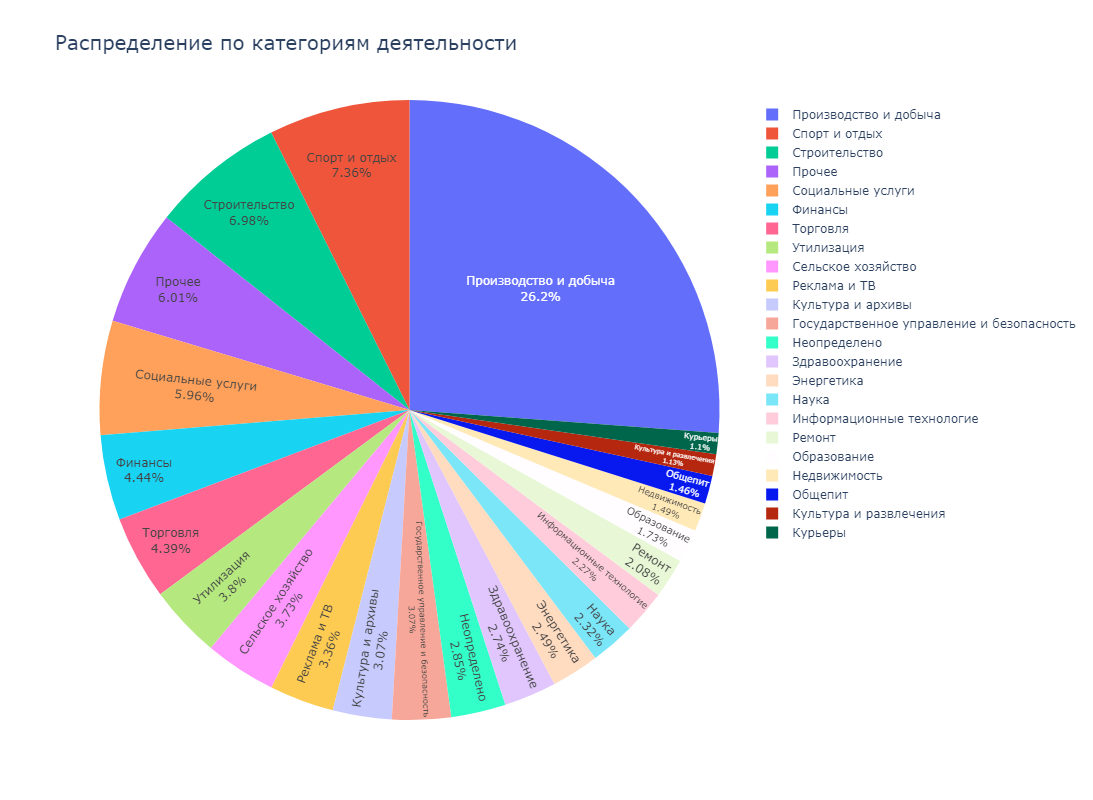

In [61]:
category_counts = data_upd.query('age in @age_0_24')['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# Create pie chart using Plotly
fig = px.pie(category_counts, values='count', names='category', title='Распределение по категориям деятельности', 
             hover_data=['count'], labels={'count':'Count'})

# Customize text position and angle
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(width=1000, height=800, title_font_size=20)
# Show plot
fig.show()

- во всех возрастных группах "Производство и добыча" является наиболее популярной категорией
- во всех возрастных группах распределение занятости по категориям деятельности аналогично друг другу
- наименее популярная категория "Курьеры" 

**Выводы по возрастным группам**:

- в возрастных группах 35-39, 40-44, 45-49, 50-54 наиболее высокое среднее количество рабочих мест, что соответствует наиболее опытному и активному трудоспособному населению
- в возрастных группах 30-34, 25-29 снижается среднее количество рабочих мест, что свидетельствует о снижении занятности у молодых и начинающих специалистов
- в группах от 55 до 69 лет наиболее высокое среднее количество рабочих мест в группе 55-59, число снижается с 2017 по 2022, что свидетельствует о снижении занятости в предпенсионном возрасте
- среднее число рабочих мест в возрастных группах от 70 лет значительно ниже, только группа 70-74 лет имеет отличающиеся от нуля значения
- в группах до 24 лет только группа 20-24 лет имеет отличающиеся от близких к нулю данные, среднее количество рабочих мест в этой группе немного снижается
- Наиболее высокий ФОТ в возрастных группах от 30 до 54 лет
- во всех возрастных группах наблюдается рост ФОТ
- в группах от 70 лет только в группе 70-74 лет среднее значение ФОТ имеет отличное от нуля значения
- в группах до 24 лет только в группе 20-24 лет среднее значение ФОТ имеет отличное от нуля значения
- во всех возрастных группах медианная зарплата демонстрирует рост
- наиболее высокая медианная зарплата в возрастных группах 40-44 и 45-49 лет, что соответствует более опытным специалистам
- во всех возрастных группах "Производство и добыча" является наиболее популярной категорией
- во всех возрастных группах распределение занятости по категориям деятельности аналогично друг другу
- наименее популярная категория "Курьеры" 

## Анализ регионов

In [62]:
# группировка данных о рабочих местах по регионам
region_jobs=grouped_jobs('region')

In [63]:
# функция для классификации областей по фелеральным округам
def federal_area(region):
    if region=="г. Москва" or region =="Московская обл."\
    or region =="Брянская обл." or region == "Белгородская обл." or region =="Калужская обл." \
    or region =="Орловская обл." or region =="Владимирская обл." or region =="Воронежская обл." or region =="Рязанская обл."\
    or region =="Тверская обл." or region =="Тульская обл." or region =="Тамбовская обл." or region =="Ярославская обл." or region =="Смоленская обл."\
    or region =="Липецкая обл." or region =="Костромская обл." or region =="Ивановская обл." or region =="Владимирская обл." or region =="Курская обл.":
        return 'Центральный ФО'
    if region=="Респ. Коми" or region=="Респ. Карелия" or region=="Архангельская обл"\
                                      or region=="Псковская обл." or region == "Калининградская обл." or region =="Вологодская обл."\
                                      or region=="Мурманская обл." or region=="г. Санкт-Петербург" or region=="Ленинградская обл.":
        return 'Северо-западный ФО'
    if region=="Респ. Адыгея" or region=="Респ. Калмыкия" or region=="Краснодарский край"\
       or region=="Астраханская обл." or region=="Волгоградская обл." or region=="Ростовская обл." or region=="Респ. Крым" or region=="г. Севастополь":
        return 'Южный ФО'
    if region=="Респ. Дагестан" or region=="Чеченская Респ." or region=="Респ. Северная Осетия-Алания" \
        or region=="Кабардино-Балкарская Респ." or region=="Респ. Северная Осетия-Алания" or region=="Ставропольский край" or region=="Респ. Ингушетия":
        return 'Северо-кавказский ФО'
    if region=="Чувашская Респ." or region=="Респ. Татарстан" or region=="Респ. Башкортостан"\
        or region=="Респ. Мордовия" or region=="Удмуртская Респ." or region=="Пермский край" or region=="Кировская обл." or region=="Нижегородская обл."\
        or region=="Оренбургская обл." or region=="Пензенская обл." or region=="Самарская обл." or region=="Саратовская обл." or region=="Ульяновская обл.":
        return 'Поволжский ФО'
    if region=="Курганская обл." or region=="Свердловская обл." or region=="Тюменская обл."\
        or region=="Челябинская обл." or region=="Ханты-Мансийский а.о." or region=="Ямало-Ненецкий а.о.":
        return 'Уральский'
    if region=="Респ. Алтай" or region=="Респ. Тыва" or region=="Респ. Хакасия" or region=="Алтайский край"\
        or region=="Красноярский край" or region=="Иркутская обл." or region=="Кемеровская обл." or region=="Новосибирская обл." or region =="Омская обл"\
        or region=="Омская обл." or region=="Томская обл.":
        return 'Сибирский ФО'
    if region=="Еврейская а.о." or region=="Респ. Саха (Якутия)" or region=="Хабаровский край"\
        or region=="Приморский край" or region=="Амурская обл." or region=="Магаданская обл." or region=="Сахалинская обл." or region=="Респ. Бурятия"\
        or region=="Чукотский а.о." or region=="Камчатский край" or region=="Забайкальский край":
        return 'Дальневосточный ФО'
    if region=="Байконур":
        return 'Байконур'

In [64]:
data_upd['FO']=data_upd['region'].apply(federal_area)

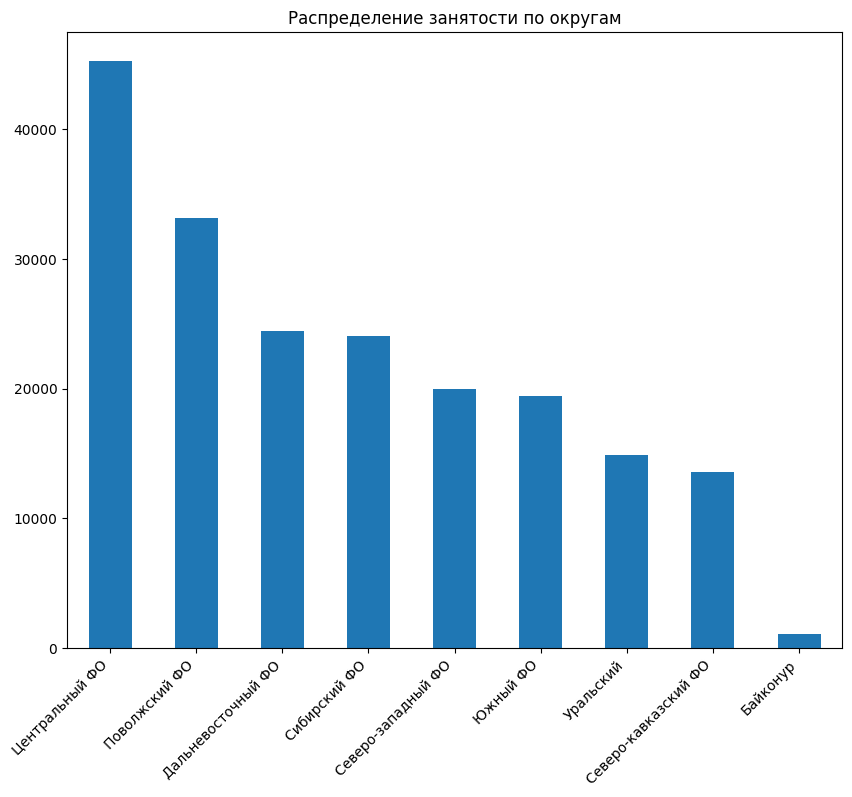

In [69]:
fig, ax = plt.subplots(figsize=(10, 8))
data_upd['FO'].value_counts().plot(kind='bar')
plt.title('Распределение занятости по округам')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.show()

Наибольший процент занятости приходится на центральный и поволжский федеральные округа, так как в данных округах наибольшее число населения

In [70]:
# группировка данных о количестве рабочих мест федеральным округам
region_jobs=grouped_jobs('FO')

In [71]:
# группировка данных о количестве рабочих мест федеральным округам
region_salary=grouped_salary('FO')

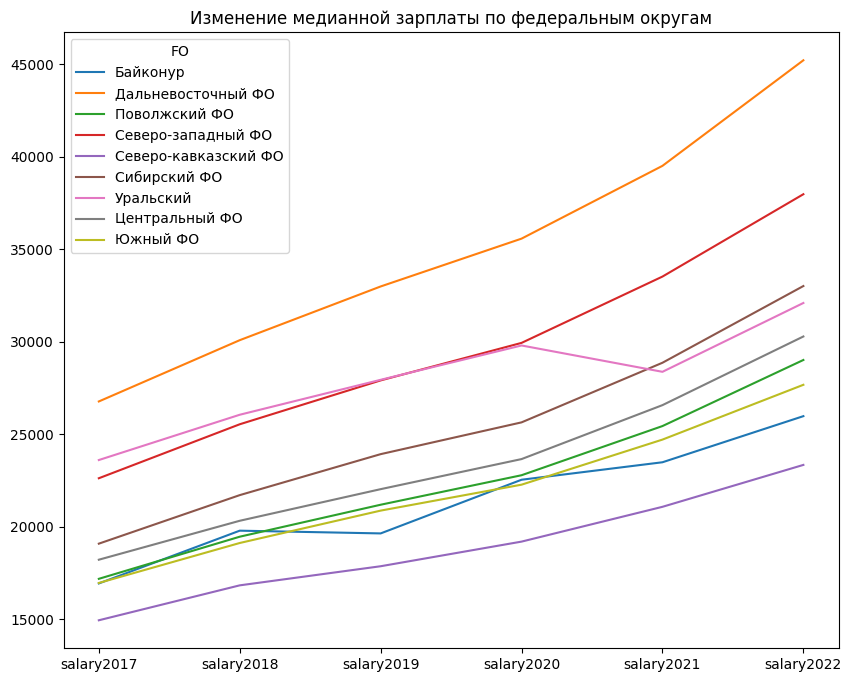

In [75]:
region_salary.T.plot(figsize = (10,8))
plt.title('Изменение медианной зарплаты по федеральным округам')
plt.show()

- Во всех федеральных округах наблюдается рост медианной зарплаты. 

- Снижение медианной зарплаты в 2021 и 2022 году в Уральском ФО связано с тем, что в данных отсутствует информация за этот период по Ханты-Мансийскому и Ямало-ненецкому автономным округам, которые составляют существенную часть рынка занятости данного региона. 

- Наиболее высокая медианная зарплата в Дальневосточном федеральном округе, что объясняется особенностями рынка труда в данном регионе - сложность климатических условий, меры помощи от государства, дефицит рабочей силы, а  также развитие наиболее  прибыльных отраслей добычи нефти, газа, угля.

- Cамая низкая зарплата приходится на Северо-кавказский федеральный округ. Северо-кавказский регион традиционно относится к наиболее бедным регионам России с высокой долей безработицы, отсутствием крупных предприятий, высокой долей населения, занятой в сельском хозяйстве и малом бизнесе



In [76]:
salary_change=(region_salary.sub(region_salary['salary2017'], axis=0)).div(region_salary['salary2017'], axis=0)

In [78]:
salary_change

salary2017  salary2018  salary2019  salary2020  \
FO                                                                     
Байконур                     0.0    0.168313    0.159567    0.330776   
Дальневосточный ФО           0.0    0.123655    0.232051    0.328584   
Поволжский ФО                0.0    0.132387    0.232874    0.325610   
Северо-западный ФО           0.0    0.128904    0.233672    0.323256   
Северо-кавказский ФО         0.0    0.126221    0.195281    0.284270   
Сибирский ФО                 0.0    0.137352    0.253329    0.343275   
Уральский                    0.0    0.103652    0.183606    0.262200   
Центральный ФО               0.0    0.115452    0.209185    0.298368   
Южный ФО                     0.0    0.127263    0.230384    0.312989   

                      salary2021  salary2022  
FO                                            
Байконур                0.386500    0.533537  
Дальневосточный ФО      0.475473    0.688497  
Поволжский ФО           0.480143    0.687802  
Северо-западный ФО      0.481636    0.678283  
Северо-кавказский ФО    0.410027    0.561448  
Сибирский ФО            0.512005    0.729110  
Уральский               0.201907    0.359422  
Центральный ФО          0.458320    0.661837  
Южный ФО                0.456533    0.631013

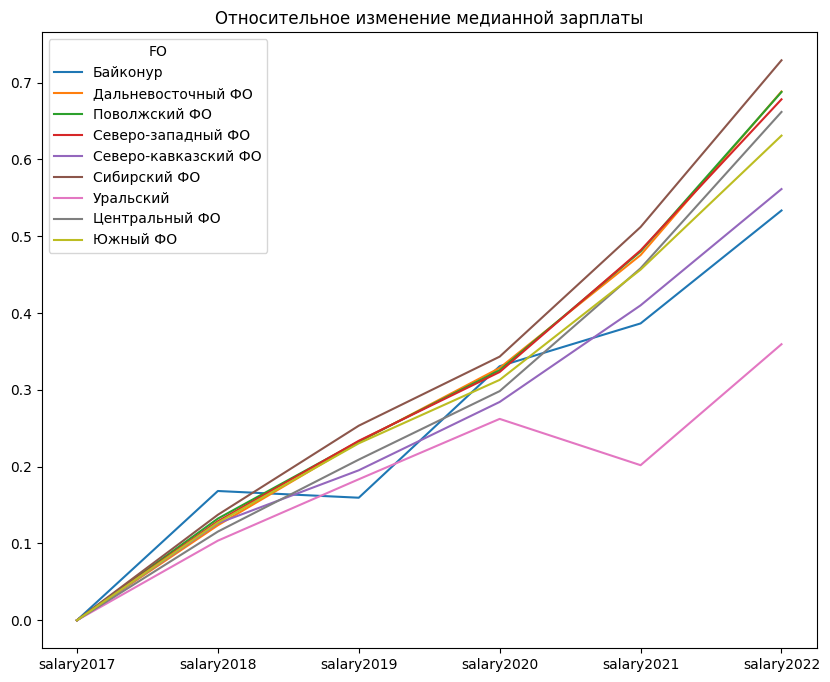

In [81]:
salary_change.T.plot(figsize = (10,8))
plt.title('Относительное изменение медианной зарплаты')
plt.show()

- Выше всего рост медианной зарплаты в Сибирском федеральном округе (73%)
- Учитывая отсутствие данных в Уральском ФО, самый низкий рост зарплат в Северо-кавказском ФО и Байконуре

In [79]:
data_upd[data_upd['FO']=='Дальневосточный ФО']\
.groupby('region')[['salary2017', 'salary2018', 'salary2019', 'salary2020', 'salary2021', 'salary2022']]\
.median()\
.sort_values(by='salary2022', ascending=False)

salary2017    salary2018    salary2019    salary2020  \
region                                                                        
Чукотский а.о.       53540.998395  58024.549355  62159.283437  69632.436953   
Магаданская обл.     40751.505957  45254.520180  49777.886000  54585.193351   
Камчатский край      41254.850354  45772.211174  50180.363475  54329.312693   
Сахалинская обл.     38223.915761  42929.641228  47117.563414  50861.961381   
Респ. Саха (Якутия)  37831.568219  42294.039789  46450.239133  48273.375054   
Приморский край      23640.495681  26989.963436  29329.871924  32166.620371   
Хабаровский край     25972.815748  28981.693676  30957.116623  33640.428831   
Амурская обл.        21132.753333  23911.639834  26679.480976  29337.568876   
Забайкальский край   18576.152972  22038.553762  24188.608738  25689.477808   
Респ. Бурятия        19272.108500  22127.926758  24172.694558  25945.183211   
Еврейская а.о.       16873.664020  19478.396228  20777.368516  23294.431639   

                       salary2021    salary2022  
region                                           
Чукотский а.о.       76476.860385  79909.905566  
Магаданская обл.     61763.592727  69050.470111  
Камчатский край      59690.133743  64203.622695  
Сахалинская обл.     54418.083144  59948.049381  
Респ. Саха (Якутия)  52116.851049  57822.069105  
Приморский край      36774.582629  42928.286009  
Хабаровский край     36737.392609  41847.811106  
Амурская обл.        32525.735557  37675.918529  
Забайкальский край   28590.185151  32997.124882  
Респ. Бурятия        29071.174874  32634.952303  
Еврейская а.о.       25202.676111  28495.156950

В Дальневосточном ФО самая высокая зарплата в Чукотском а.о., рост зарплаты составил 50%. Самая низкая в Еврейской а.о., рост зарплаты 69%

In [82]:
data_upd[data_upd['FO']=='Поволжский ФО']\
.groupby('region')[['salary2017', 'salary2018', 'salary2019', 'salary2020', 'salary2021', 'salary2022']]\
.median()\
.sort_values(by='salary2022', ascending=False)

salary2017    salary2018    salary2019    salary2020  \
region                                                                       
Респ. Татарстан     19732.244913  22447.887409  24635.179871  26937.548750   
Пермский край       19799.622744  22331.543590  24305.888701  26205.903353   
Нижегородская обл.  18991.306452  21382.721155  23330.559658  24793.861544   
Самарская обл.      18419.474462  20841.601642  22489.479424  24347.596142   
Респ. Башкортостан  19256.263346  21696.623173  23807.402793  25425.224263   
Удмуртская Респ.    17680.928224  20004.222553  21729.975580  23425.389367   
Саратовская обл.    15774.114714  17956.751033  19735.922763  21261.518197   
Оренбургская обл.   16323.960395  18414.528210  20202.582595  21577.867671   
Чувашская Респ.     16015.716734  17808.680871  19511.024342  21236.304335   
Кировская обл.      15413.371230  17729.630503  19541.093464  20783.458524   
Ульяновская обл.    15892.355924  18077.854470  19288.410935  20776.859047   
Пензенская обл.     15102.445036  17265.186699  18999.271323  20194.155932   
Респ. Мордовия      16370.715296  18417.109475  19502.209295  20408.992194   

                      salary2021    salary2022  
region                                          
Респ. Татарстан     30778.713186  35778.085501  
Пермский край       28732.235942  32898.682782  
Нижегородская обл.  28526.237820  32799.730746  
Самарская обл.      27557.590189  31487.524242  
Респ. Башкортостан  28481.003127  31188.644890  
Удмуртская Респ.    25410.000702  28416.012804  
Саратовская обл.    24112.437500  28092.388340  
Оренбургская обл.   23752.654523  27193.817829  
Чувашская Респ.     23981.482507  26757.825682  
Кировская обл.      23337.457124  26229.856052  
Ульяновская обл.    22984.526708  26223.819729  
Пензенская обл.     22555.165573  26217.882794  
Респ. Мордовия      22750.288718  26012.571553

В Поволжском ФО самая высокая зарплата в Республике Татарстан, рост зарплаты составил 81%. Самая низкая зарплата в Республике Мордовия, рост зарплаты составил 55%

In [83]:
data_upd[data_upd['FO']=='Северо-западный ФО']\
.groupby('region')[['salary2017', 'salary2018', 'salary2019', 'salary2020', 'salary2021', 'salary2022']]\
.median()\
.sort_values(by='salary2022', ascending=False)

salary2017    salary2018    salary2019    salary2020  \
region                                                                         
г. Санкт-Петербург    33488.306808  36049.277796  38537.086491  41130.961170   
Мурманская обл.       30990.931437  35276.555442  37712.254641  39658.710762   
Ленинградская обл.    25036.172566  27846.167214  30961.332692  32469.219545   
Респ. Коми            25638.964319  29108.614058  32166.842692  34588.325436   
Респ. Карелия         21330.977060  24895.504945  26907.702066  29138.179804   
Калининградская обл.  19134.862017  21298.122033  23592.404400  25021.789586   
Вологодская обл.      18074.222473  19805.366729  21909.325462  24385.629386   
Псковская обл.        15287.741415  17405.807401  18788.621768  20105.781749   

                        salary2021    salary2022  
region                                            
г. Санкт-Петербург    45758.191001  52288.512016  
Мурманская обл.       44173.118711  51022.773213  
Ленинградская обл.    36070.710427  41461.601165  
Респ. Коми            37498.160737  40946.173718  
Респ. Карелия         32862.146766  37445.168817  
Калининградская обл.  28656.062011  33416.100859  
Вологодская обл.      27659.332384  31372.921933  
Псковская обл.        22785.335190  26174.686753

В Северо-западном ФО самая высокая зарплата в Санкт-Петербурге, рост зарплаты составил 56%, самая низкая - в Псковской области, рост составил 72%

In [84]:
data_upd[data_upd['FO']=='Северо-кавказский ФО']\
.groupby('region')[['salary2017', 'salary2018', 'salary2019', 'salary2020', 'salary2021', 'salary2022']]\
.median()\
.sort_values(by='salary2022', ascending=False)

salary2017    salary2018    salary2019  \
region                                                                   
Ставропольский край           15958.370448  17812.405398  19229.026146   
Чеченская Респ.               17505.908856  19891.187239  21077.992275   
Респ. Дагестан                14300.503890  16686.947965  17693.635721   
Респ. Северная Осетия-Алания  14475.769474  16453.530906  17089.059224   
Кабардино-Балкарская Респ.    13633.657010  15353.349333  16494.898814   
Респ. Ингушетия               14497.629525  15391.228333  16182.897286   

                                salary2020    salary2021    salary2022  
region                                                                  
Ставропольский край           20633.072377  23220.100333  26448.179754  
Чеченская Респ.               22282.942214  23515.787804  25000.757775  
Респ. Дагестан                19529.220609  21282.312070  23787.163351  
Респ. Северная Осетия-Алания  17948.785000  20057.833423  22400.280923  
Кабардино-Балкарская Респ.    17341.458532  19586.370976  21610.134193  
Респ. Ингушетия               18366.618776  19797.716422  20171.964609

В Северо-кавказском округе самая высокая зарплата в Ставропольском крае, рост составил 65%, самая низкая в Республике Ингушетия, рост составил 39%

In [85]:
data_upd[data_upd['FO']=='Сибирский ФО']\
.groupby('region')[['salary2017', 'salary2018', 'salary2019', 'salary2020', 'salary2021', 'salary2022']]\
.median()\
.sort_values(by='salary2022', ascending=False)

salary2017    salary2018    salary2019    salary2020  \
region                                                                       
Красноярский край   24304.702342  27622.626640  30360.449195  32561.677033   
Иркутская обл.      23726.171560  26720.124973  29450.099799  31352.216221   
Новосибирская обл.  20279.360927  22605.486100  24630.077085  26289.869184   
Томская обл.        21415.111211  23441.519517  25586.806553  27749.294160   
Респ. Тыва          18278.264893  21704.265300  25079.745384  27630.125714   
Кемеровская обл.    18360.825782  21229.977906  23646.490371  24767.514416   
Омская обл.         16749.289156  19213.523837  20936.055507  22977.615114   
Респ. Хакасия       18096.694177  20615.331673  22290.161037  23988.662581   
Алтайский край      15237.498897  17258.462804  19458.824486  20849.325329   
Респ. Алтай         15964.865136  18938.050880  20223.869143  21677.021875   

                      salary2021    salary2022  
region                                          
Красноярский край   36936.627723  41325.840901  
Иркутская обл.      35532.889328  40182.146603  
Новосибирская обл.  30128.615112  34986.710315  
Томская обл.        30368.219635  33868.619200  
Респ. Тыва          30674.884922  33540.665761  
Кемеровская обл.    27687.155373  31991.216463  
Омская обл.         26304.105762  30468.901207  
Респ. Хакасия       26756.045909  30413.873240  
Алтайский край      23562.860745  27343.625707  
Респ. Алтай         23729.865547  27166.466035

В Сибирском ФО самая высокая зарплата в Красноярском крае, рост составил 70%, самая низкая - в республике Алтай, рост составил 70% 

In [86]:
data_upd[data_upd['FO']=='Уральский']\
.groupby('region')[['salary2017', 'salary2018', 'salary2019', 'salary2020', 'salary2021', 'salary2022']]\
.median()\
.sort_values(by='salary2022', ascending=False)

salary2017    salary2018    salary2019    salary2020  \
region                                                                          
Тюменская обл.         23759.575862  26150.410000  27943.668500  29606.688264   
Свердловская обл.      22004.831206  24337.287378  26441.944648  28189.360000   
Челябинская обл.       19147.228425  21253.801355  23412.423875  24833.613441   
Курганская обл.        14975.961807  17369.399020  18795.679883  20354.085488   
Ханты-Мансийский а.о.  35901.185424  39299.605165  42518.605636  45190.006857   
Ямало-Ненецкий а.о.    48465.103651  51879.055682  53354.354104  56621.835442   

                         salary2021    salary2022  
region                                             
Тюменская обл.         33246.641994  36717.633655  
Свердловская обл.      31188.156625  34651.149592  
Челябинская обл.       27056.466228  30863.703339  
Курганская обл.        22605.514837  26150.949442  
Ханты-Мансийский а.о.           NaN           NaN  
Ямало-Ненецкий а.о.             NaN           NaN

В Уральском ФО самые высокие зарплаты демонстрировали Ханты-Мансийский и Ямало-ненецкий а.о., но ввиду отсутствия данных по этим регионам за 2021 и 2022 годы, невозможно оценить рост зарплат в них. Самая низкая зарплата - в Курганской области, рост составил 75%

In [87]:
data_upd[data_upd['FO']=='Центральный ФО']\
.groupby('region')[['salary2017', 'salary2018', 'salary2019', 'salary2020', 'salary2021', 'salary2022']]\
.median()\
.sort_values(by='salary2022', ascending=False)

salary2017    salary2018    salary2019    salary2020  \
region                                                                      
г. Москва          45890.942810  50847.368974  54599.881887  57265.463888   
Московская обл.    30913.273469  33393.260664  36469.588406  38384.951303   
Калужская обл.     21082.026622  23386.720336  25288.857892  26718.487014   
Тульская обл.      20470.682628  22960.564000  24282.323976  25527.680301   
Белгородская обл.  18613.823988  20659.087569  22243.061877  24238.047064   
Воронежская обл.   17686.485130  19886.651914  21400.000000  23060.904991   
Владимирская обл.  17668.505149  19692.446479  21303.224994  22989.000000   
Тверская обл.      18106.656997  20384.474648  22060.319563  23626.969951   
Ярославская обл.   18335.124965  20510.595570  22081.639083  23772.641029   
Рязанская обл.     16968.336929  19699.520030  21331.153626  22895.069527   
Липецкая обл.      17765.883448  19737.737767  21590.589034  22810.461494   
Курская обл.       16784.847481  18438.201625  19947.440469  21228.120727   
Брянская обл.      15721.126503  17789.915383  19407.766338  21104.642570   
Смоленская обл.    16538.087638  18764.525200  20121.145965  21341.376035   
Орловская обл.     15574.402013  17120.864260  18560.578320  20045.100379   
Костромская обл.   14507.560843  16588.613624  17874.667424  19140.428935   
Тамбовская обл.    14804.380441  16514.437625  18553.134622  19823.091914   
Ивановская обл.    13584.348101  15578.477168  16618.116095  17553.027639   

                     salary2021    salary2022  
region                                         
г. Москва          62833.022267  71765.967962  
Московская обл.    43060.399163  47881.683743  
Калужская обл.     29545.059410  34385.830056  
Тульская обл.      29369.854308  32945.023418  
Белгородская обл.  27273.381921  31094.024626  
Воронежская обл.   26201.516837  30711.772878  
Владимирская обл.  25916.101056  30113.333333  
Тверская обл.      26520.469066  29540.916342  
Ярославская обл.   26217.624366  29365.018081  
Рязанская обл.     26017.168944  29112.548275  
Липецкая обл.      25529.356888  28929.355524  
Курская обл.       24367.556887  28323.006408  
Брянская обл.      23586.956239  27219.213226  
Смоленская обл.    23530.804006  26783.644139  
Орловская обл.     22815.798243  25797.744289  
Костромская обл.   21556.204613  24291.852397  
Тамбовская обл.    21893.854482  24215.321456  
Ивановская обл.    20009.646108  22879.675833

В центральном ФО самая высокая зарплата в Москве, рост составил 56%. Самая низкая в Ивановской области, рост составил 68%

In [88]:
data_upd[data_upd['FO']=='Южный ФО']\
.groupby('region')[['salary2017', 'salary2018', 'salary2019', 'salary2020', 'salary2021', 'salary2022']]\
.median()\
.sort_values(by='salary2022', ascending=False)

salary2017    salary2018    salary2019    salary2020  \
region                                                                       
Краснодарский край  20474.335555  22530.264115  24535.315526  25599.299425   
Ростовская обл.     17997.388191  20247.163311  22071.143822  23828.226297   
г. Севастополь      17678.198979  20202.071924  22314.784580  24316.929118   
Респ. Крым          18507.497389  20591.683042  22153.902020  23175.585471   
Волгоградская обл.  17113.650534  18675.891888  20223.821108  21825.147045   
Астраханская обл.   15154.258112  17788.315353  19259.956611  20055.999653   
Респ. Адыгея        14352.583488  16414.061669  18420.119432  19250.041051   
Респ. Калмыкия      13221.945056  15625.165833  16750.060962  18437.927500   

                      salary2021    salary2022  
region                                          
Краснодарский край  28868.225166  33309.848415  
Ростовская обл.     26944.461350  31352.240416  
г. Севастополь      26918.711515  29131.811020  
Респ. Крым          25343.626944  28044.418597  
Волгоградская обл.  24057.326862  26958.511182  
Астраханская обл.   22402.330240  25209.796842  
Респ. Адыгея        21900.868902  24565.960000  
Респ. Калмыкия      19415.793996  20853.535938

В Южном ФО самая высокая зарплата в Краснодарском крае, рост составил 63%, самая низкая зарплата в Республике Калмыкия, рост составил 57%

In [89]:
# функция для отрисовки категорий деятельности по регионам
def category_plot(region):
    category_counts = data_upd[data_upd['FO']==region]['category'].value_counts().reset_index()
    category_counts.columns = ['category', 'count']

    fig = px.treemap(category_counts, path=['category'], values='count',
                 color='count', hover_data={'category': True, 'count': True},
                 color_continuous_scale='RdBu',
                 title='Распределение занятости по категориям деятельности')

    # Update layout for better visualization
    fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

    # Show plot
    fig.show()

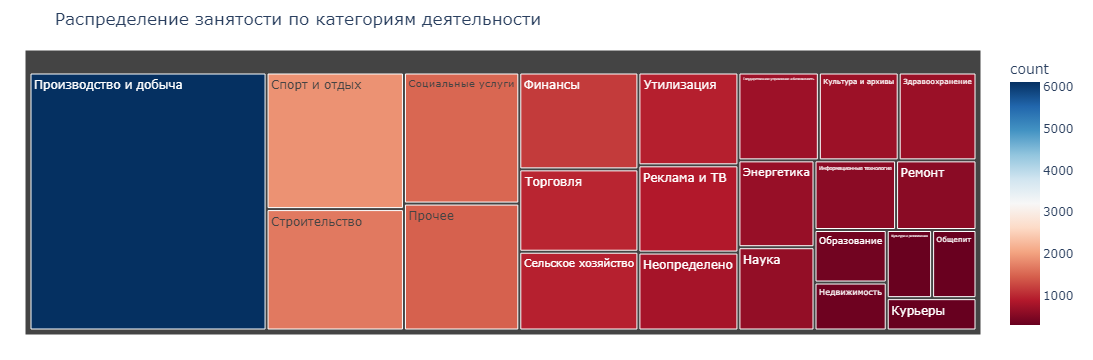

In [90]:
category_plot("Дальневосточный ФО")

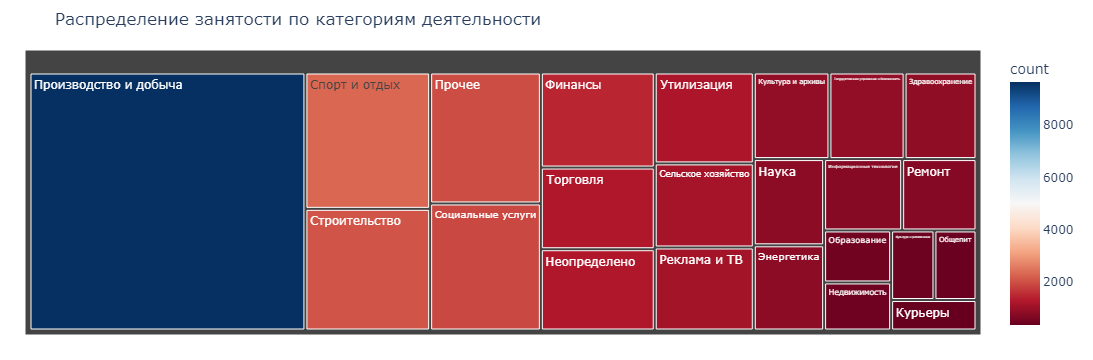

In [91]:
category_plot("Поволжский ФО")

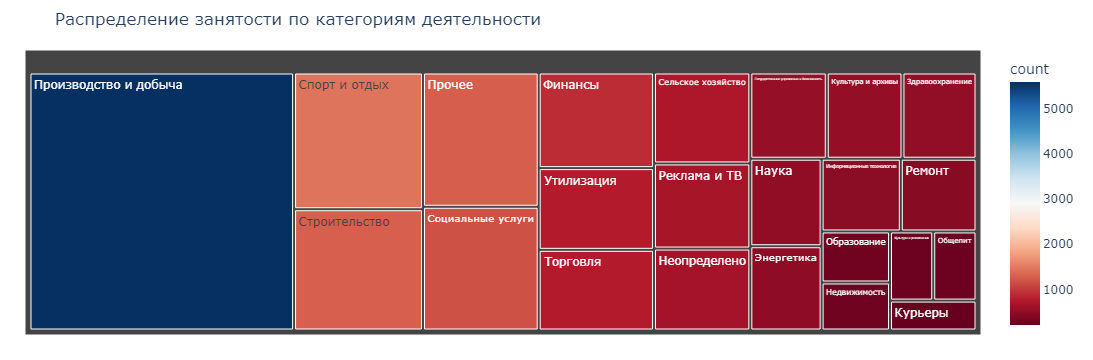

In [92]:
category_plot("Северо-западный ФО")

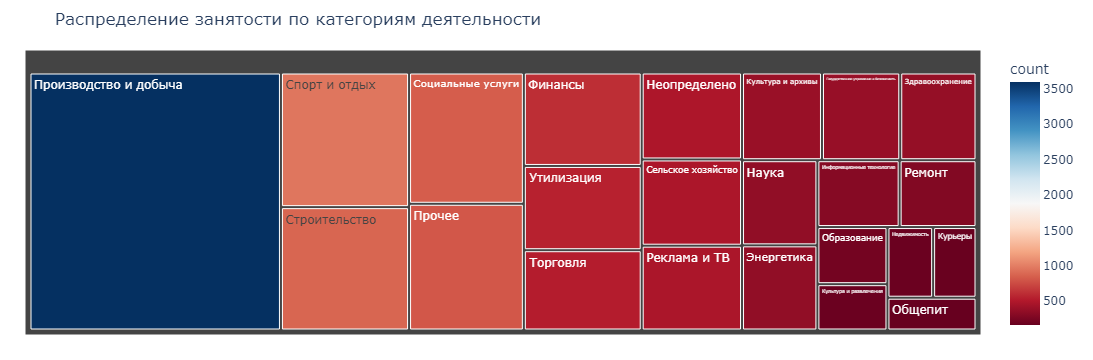

In [93]:
category_plot("Северо-кавказский ФО")

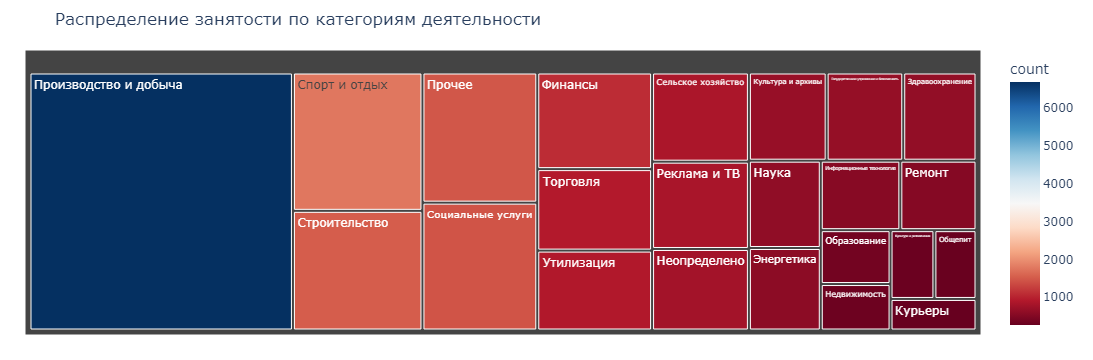

In [94]:
category_plot("Сибирский ФО")

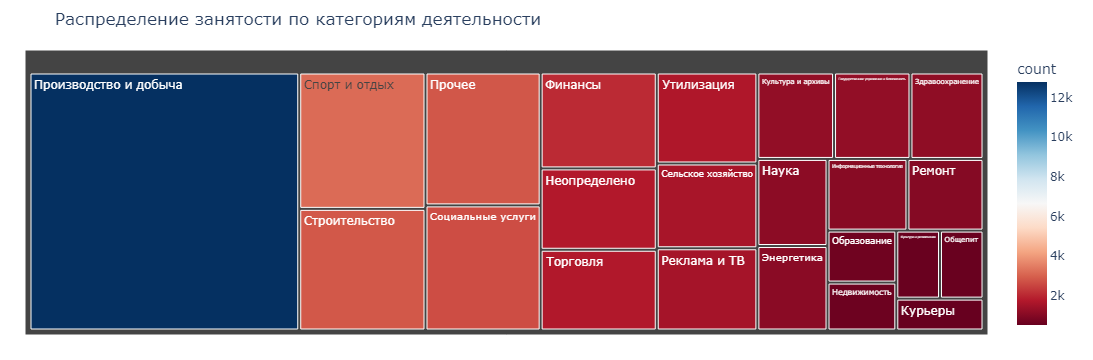

In [95]:
category_plot("Центральный ФО")

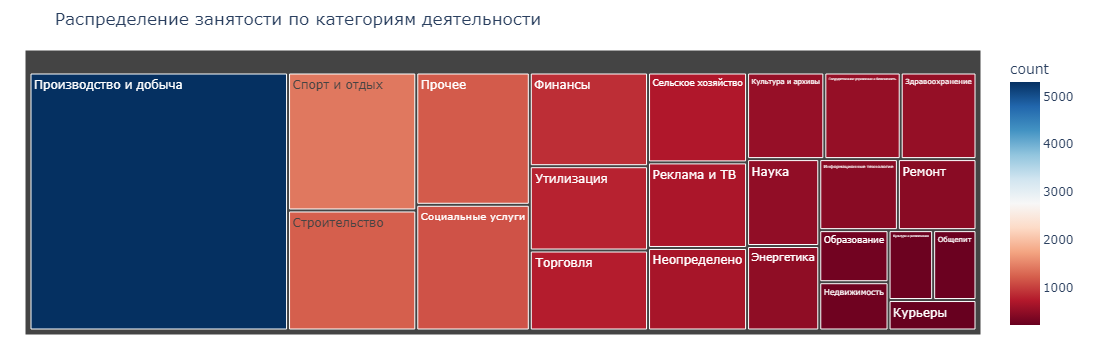

In [96]:
category_plot("Южный ФО")

- Во всех регионах в производстве и добычи занят основной процент трудящихся, далее идет спорт и строительство
-  Так как производство и добыча основная категория деятельности, рассмотрим подробнее, что именно входит в эту категорию по федеральным округам

In [98]:
# функция для отрисовки производственных работ по федеральным округам
def production_plot(region):
    category_counts = data_upd[(data_upd['category']=="Производство и добыча")&(data_upd['FO']==region)]['job'].value_counts().reset_index()
    category_counts.columns = ['category', 'count']
    fig = px.treemap(category_counts, path=['category'], values='count',
                 color='count', hover_data={'category': True, 'count': True},
                 color_continuous_scale='RdBu',
                 title='Распределение занятости по категориям деятельности')

    # Update layout for better visualization
    fig.update_layout(margin=dict(t=50, l=25, r=25, b=25), width=1200,  # Set the width of the plot
    height=800)

    # Show plot
    fig.show()

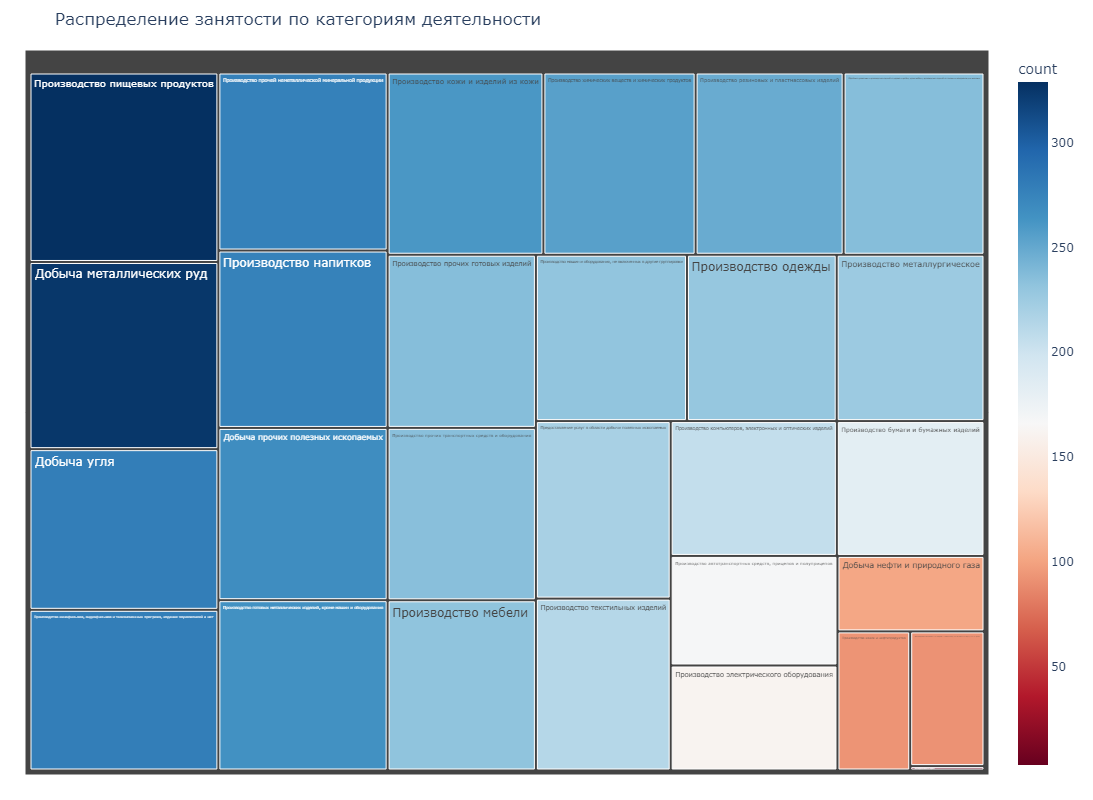

In [99]:
production_plot("Дальневосточный ФО")

В топ производств в дальневосточном округе входит производство пищевых продуктов и напитков, добыча металлических руд, добыча угля и прочих полезных ископаемых, производство неметаллической минеральной продукции, производство кинофильмов, меньше всего людей задействовано в производстве лекарственных средств

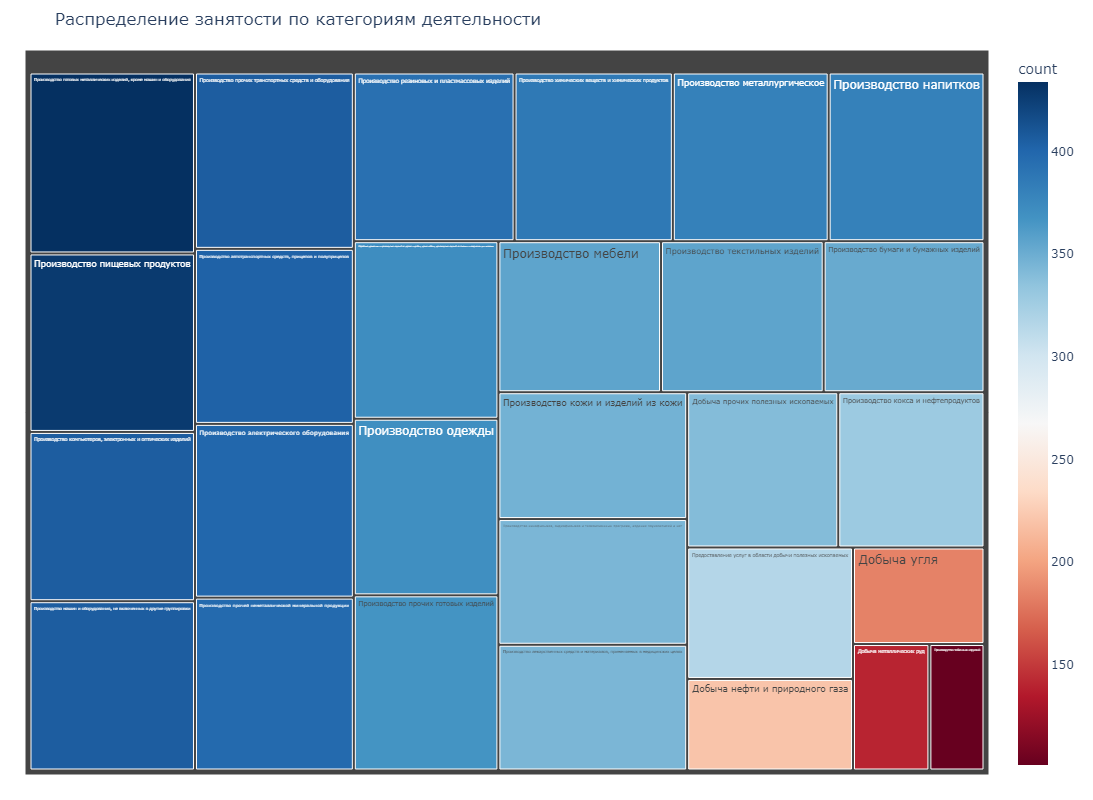

In [100]:
production_plot("Поволжский ФО")

В Поволожском округе наиболее популярные категории деятельности: 
- производство готовых металлических изделий
- производство пищевых продуктов
- производство компьютеров и электронных изделий
- производство машин и оборудования
- производство автотранспортных средств
- производство электрического оборудования
- производство неметаллической продукции

Меньше всего людей задействовано в производстве табачных изделий и добыче металлических руд

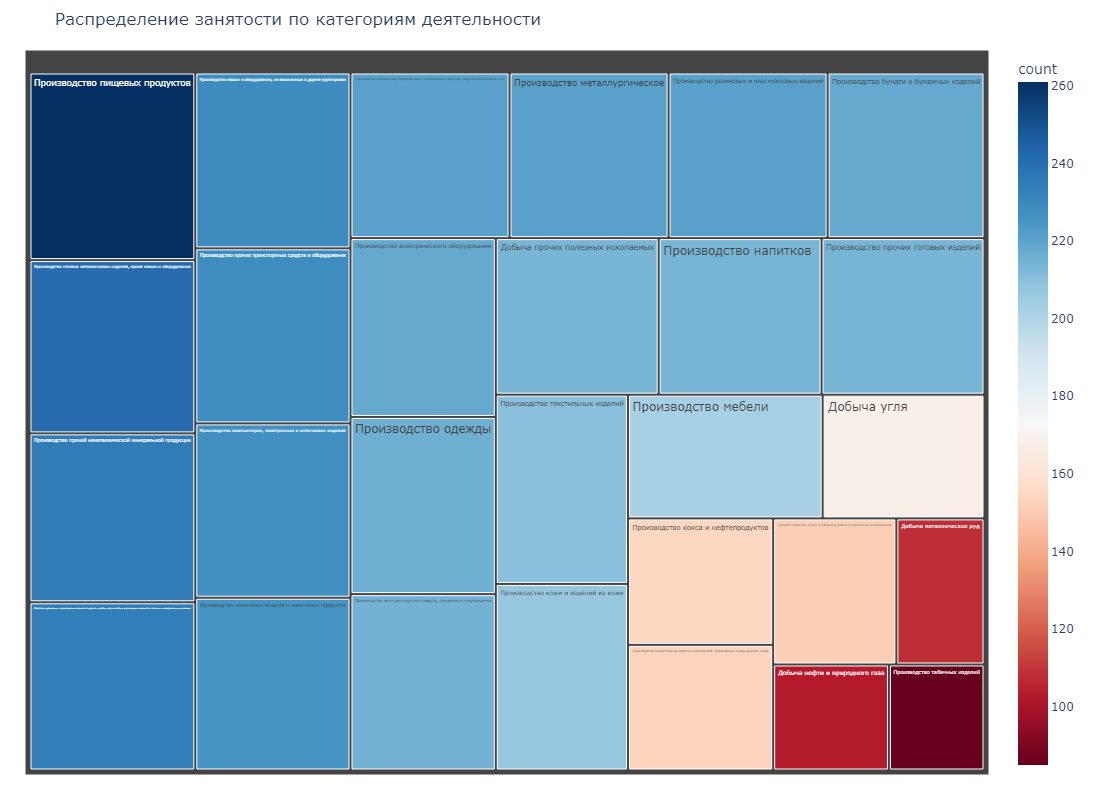

In [101]:
production_plot("Северо-западный ФО")

В Северо-западном федеральном округе наиболее популярные категории деятельности:
- производство пищевых продуктов
- производство металлических изделий
- производство неметаллической минеральной продукции
- производство машин и прочих транспортных средств
- производство компьютеров
- производство химических веществ
  
Меньше всего людей задействовано в производстве табачных изделий, а также добычи руд и нефти

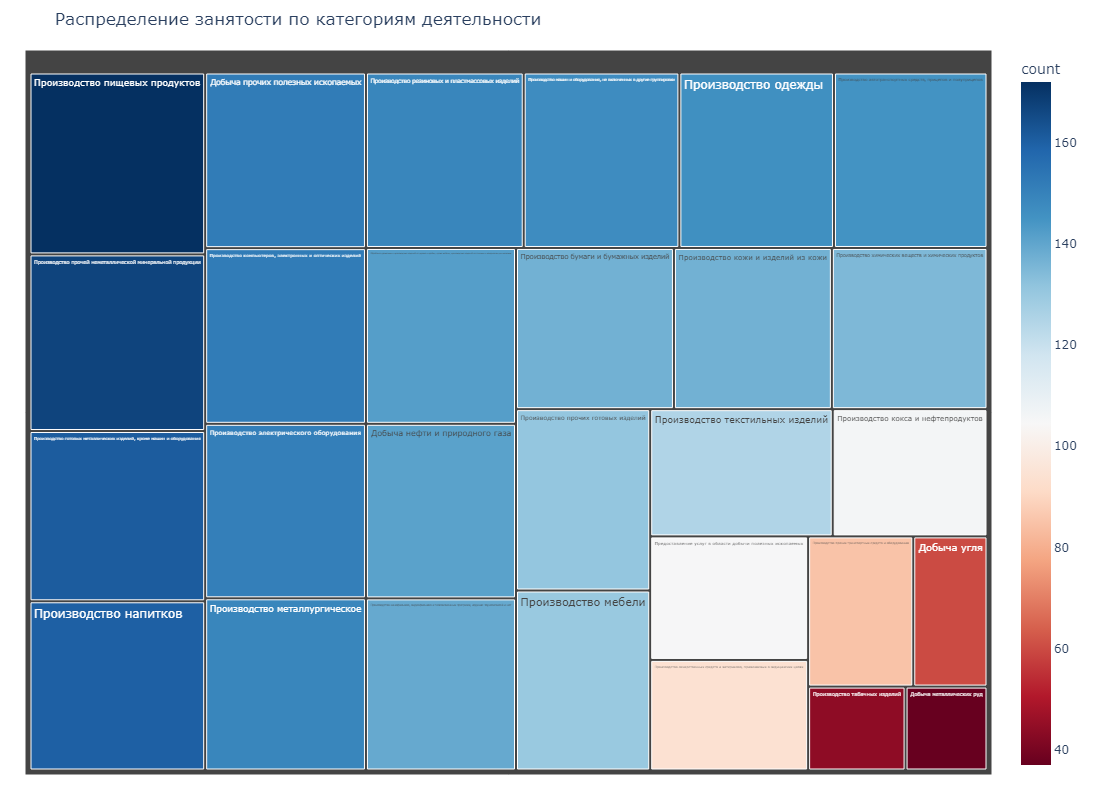

In [102]:
production_plot("Северо-кавказский ФО")

В Северо-западном федеральном округе наиболее популярные категории деятельности:
- производство пищевых продуктов
- производство металлических изделий
- производство неметаллической минеральной продукции
- производство машин и прочих транспортных средств
- производство компьютеров
- производство электрического оборудования
- производство металлургическое

Меньше всего людей задействовано в производстве табачных изделий, а также добычи руд и нефти

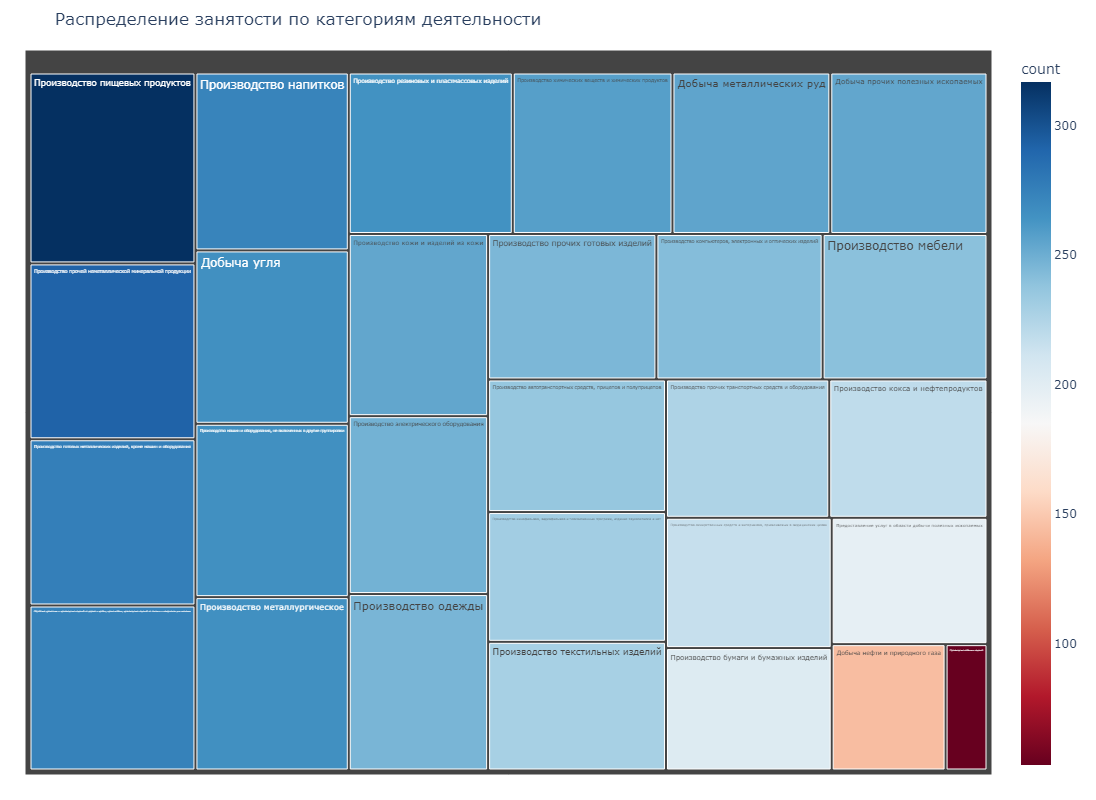

In [104]:
production_plot("Сибирский ФО")

В Северо-западном федеральном округе наиболее популярные категории деятельности:
- производство пищевых продуктов и напитков
- производство металлических изделий
- производство неметаллической минеральной продукции
- обработка древесины
- добыча угля
- производство машин и оборудованя
- производство металлургическое

Меньше всего людей задействовано в производстве табачных изделий

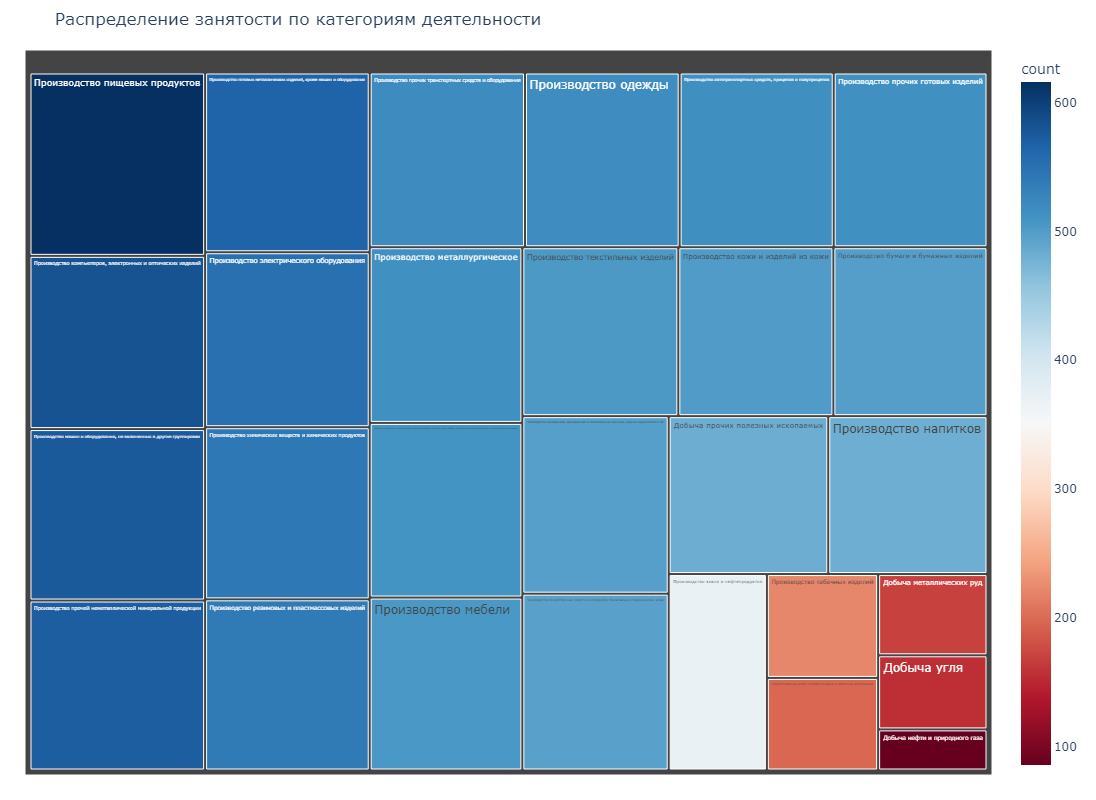

In [105]:
production_plot("Центральный ФО")

В Центральном федеральном округе наиболее популярные категории деятельности:
- производство пищевых продуктов и напитков
- производство компьютеров
- производство машин и оборудованя
- производство неметаллической минеральной продукции
- производство готовых металлических изделий
- производство электрического оборудования
- производство химических веществ
- производство резиновых изделий

Меньше всего людей задействовано в добыче нефти и газа

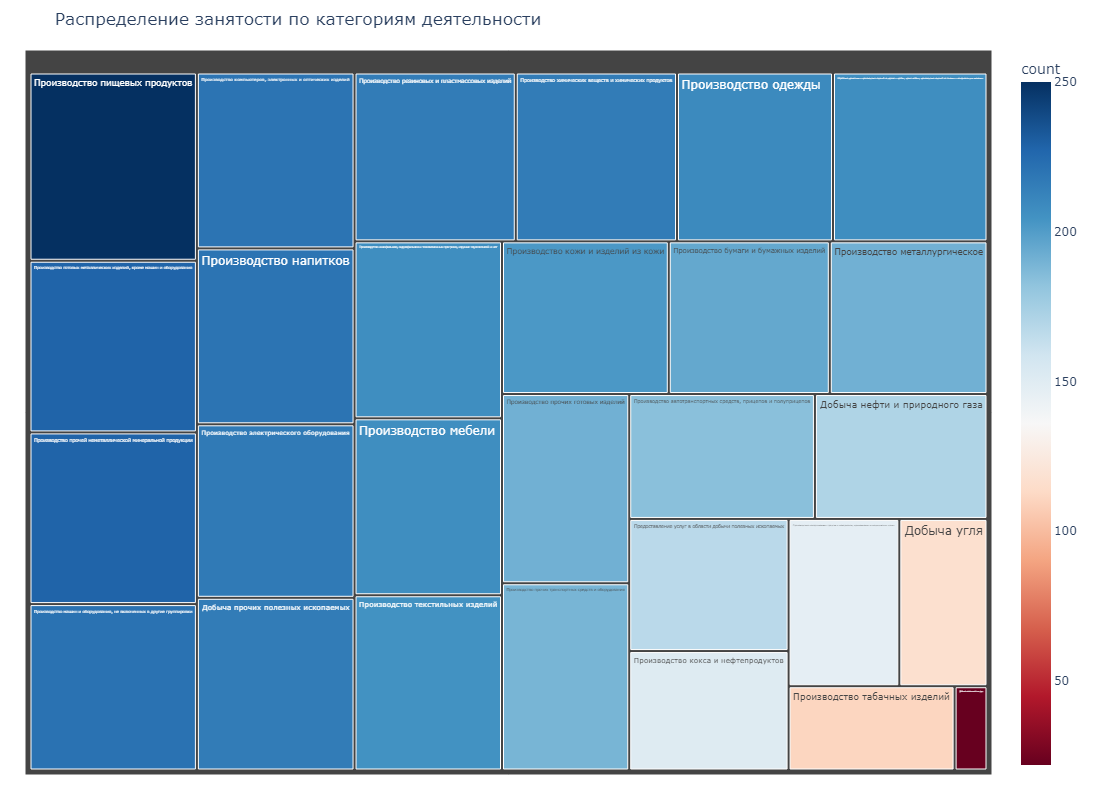

In [106]:
production_plot("Южный ФО")

В Южном федеральном округе наиболее популярные категории деятельности:
- производство пищевых продуктов и напитков
- производство готовых металлических изделий
- производство неметаллической минеральной продукции
- производство машин и оборудованя
- производство компьютеров
- производство электрического оборудования
- добыча полезных ископаемых

Меньше всего людей задействовано в добыче металлических руд

- в целом по регионам распределение в производственной деятельности равномерное, в каждой из категорий представлено примерно одинаковое количество работающего населения
- в каждом из регионов производство пищевых продуктов наиболее представленная категория
- во всех регионах также наиболее представленные категории производство металлических изделий, производство неметаллической минеральной продукции, производство машин и оборудования
-  в Дальневоосточном округе наиболее распространена добыча полезных ископаемых по сравнению с другими регионами
-  в Поволжском округе выделяется производство автотранспортных средств по сравнению с другими регионами
-  в центральном округе более представлено производство компьютеров, электрического оборудования, химических веществ, то есть более наукоемких производств

**Выводы по регионам**:

- Наибольший процент занятости приходится на центральный и поволжский федеральные округа, так как в данных округах наибольшее число населения
- Во всех федеральных округах наблюдается рост медианной зарплаты. 

- Снижение медианной зарплаты в 2021 и 2022 году в Уральском ФО связано с тем, что в данных отсутствует информация за этот период по Ханты-Мансийскому и Ямало-ненецкому автономным округам, которые составляют существенную часть рынка занятости данного региона. 

- Наиболее высокая медианная зарплата в Дальневосточном федеральном округе, что объясняется особенностями рынка труда в данном регионе - сложность климатических условий, меры помощи от государства, дефицит рабочей силы, а  также развитие наиболее  прибыльных отраслей добычи нефти, газа, угля.

- Cамая низкая зарплата приходится на Северо-кавказский федеральный округ. Северо-кавказский регион традиционно относится к наиболее бедным регионам России с высокой долей безработицы, отсутствием крупных предприятий, высокой долей населения, занятой в сельском хозяйстве и малом бизнесе
-  Выше всего рост медианной зарплаты в Сибирском федеральном округе (73%)
- Учитывая отсутствие данных в Уральском ФО, самый низкий рост зарплат в Северо-кавказском ФО и Байконуре (около 50%)
- Самая низкая зарплата в республике Ингушетия, в этом же регионе самый низкий рост зарплаты с 2017 года (39%)
- Самая высокая зарплата в Чукотском а.о. (79909 руб)
- Наиболее высокий рост зарплат с 2017 года был в республике Татарстан, рост 81%
- Во всех регионах в производстве и добычи занят основной процент трудящихся, далее идет спорт и строительство
- Во всех регионах наибольшее количество людей занято в производстве пищевых продуктов

## Анализ относительных изменений в рабочих местах и зарплате

In [107]:
# расчет относительного изменения рабочих мест
data_upd['changejobs2018'] = np.where((data_upd['jobs2017'].isnull()) | (data_upd['jobs2017'] == 0),
                                      np.nan,
                                      (data_upd['jobs2018'] - data_upd['jobs2017']) / data_upd['jobs2017'])

In [108]:
# расчет относительного изменения рабочих мест
data_upd['changejobs2019'] = np.where((data_upd['jobs2018'].isnull()) | (data_upd['jobs2018'] == 0),
                                      np.nan,
                                      (data_upd['jobs2019'] - data_upd['jobs2018']) / data_upd['jobs2018'])

In [109]:
# расчет относительного изменения рабочих мест
data_upd['changejobs2020'] = np.where((data_upd['jobs2019'].isnull()) | (data_upd['jobs2019'] == 0),
                                      np.nan,
                                      (data_upd['jobs2020'] - data_upd['jobs2019']) / data_upd['jobs2019'])

In [110]:
# расчет относительного изменения рабочих мест
data_upd['changejobs2021'] = np.where((data_upd['jobs2020'].isnull()) | (data_upd['jobs2020'] == 0),
                                      np.nan,
                                      (data_upd['jobs2021'] - data_upd['jobs2020']) / data_upd['jobs2020'])

In [111]:
# расчет относительного изменения рабочих мест
data_upd['changejobs2022'] = np.where((data_upd['jobs2021'].isnull()) | (data_upd['jobs2021'] == 0),
                                      np.nan,
                                      (data_upd['jobs2022'] - data_upd['jobs2021']) / data_upd['jobs2021'])

In [112]:
data_upd['changejobs_total']=data_upd['changejobs2018']+data_upd['changejobs2019']+data_upd['changejobs2020']+data_upd['changejobs2021']+data_upd['changejobs2022']

In [113]:
# топ 10 регионов по изменению количества рабочих мест
top10_region=data_upd.sort_values(by='changejobs_total', ascending=False).head(10)
top10_region=top10_region['region']

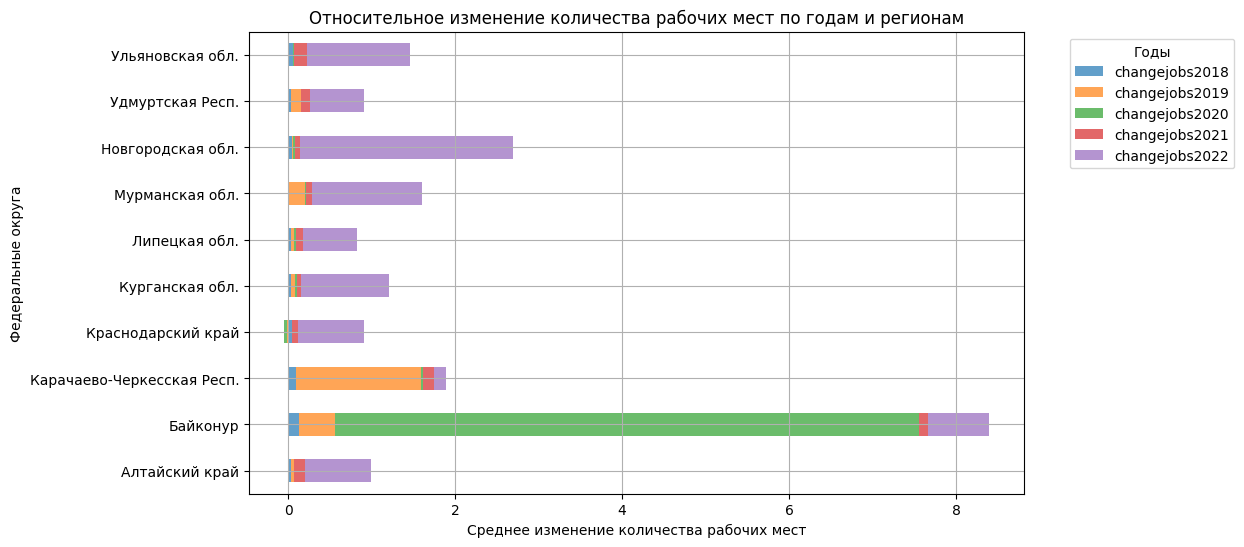

In [119]:
data_upd\
.query('region in @top10_region')\
.groupby('region')[['changejobs2018', 'changejobs2019', 'changejobs2020', 'changejobs2021', 'changejobs2022']].mean().\
head(10).plot(kind='barh', stacked=True, figsize=(10, 6), alpha=0.7)
plt.ylabel('Федеральные округа')
plt.xlabel('Среднее изменение количества рабочих мест')
plt.title('Относительное изменение количества рабочих мест по годам и регионам')
plt.legend(title='Годы', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)


Байконур демонстрирует наибольший относительный рост количества рабочих мест среди всех регионов, что может быть связано с масштабными проектами или инвестициями в инфраструктуру и космическую отрасль

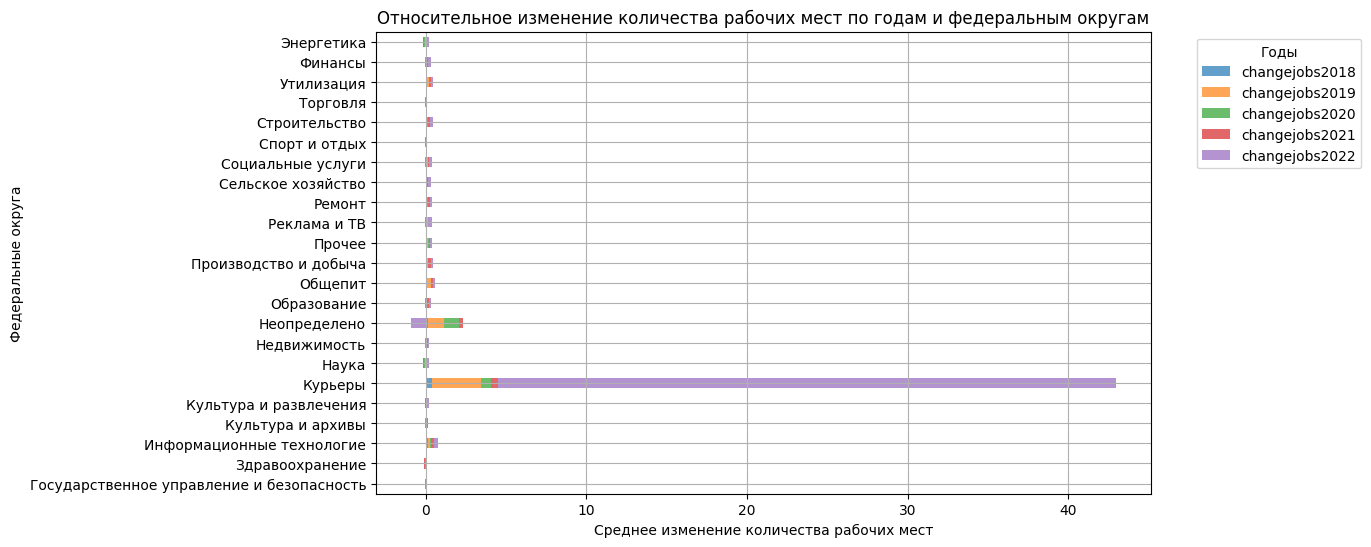

In [118]:
data_upd\
.groupby('category')[['changejobs2018', 'changejobs2019', 'changejobs2020', 'changejobs2021', 'changejobs2022']].mean()\
.plot(kind='barh', stacked=True, figsize=(10, 6), alpha=0.7)
plt.ylabel('Федеральные округа')
plt.xlabel('Среднее изменение количества рабочих мест')
plt.title('Относительное изменение количества рабочих мест по годам и федеральным округам')
plt.legend(title='Годы', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

Профессия курьеров демонстрирует наибольший рост количества рабочих мест, связанного с ростом спроса на данных специалистов

In [121]:
# группировка данных о зарплате по регионам
area_salary=grouped_salary('region')
# расчет роста зарплаты относительно 2017 года
salary_change_area=(area_salary.sub(area_salary['salary2017'], axis=0)).div(area_salary['salary2017'], axis=0)
# топ-10 регионов по росту зарплаты в 2022 году
salary_change_area=salary_change_area.sort_values(by='salary2022', ascending=False).head(10)

In [126]:
area_salary[area_salary.index=='Респ. Тыва']

salary2017  salary2018    salary2019    salary2020  \
region                                                             
Респ. Тыва  18278.264893  21704.2653  25079.745384  27630.125714   

              salary2021    salary2022  
region                                  
Респ. Тыва  30674.884922  33540.665761

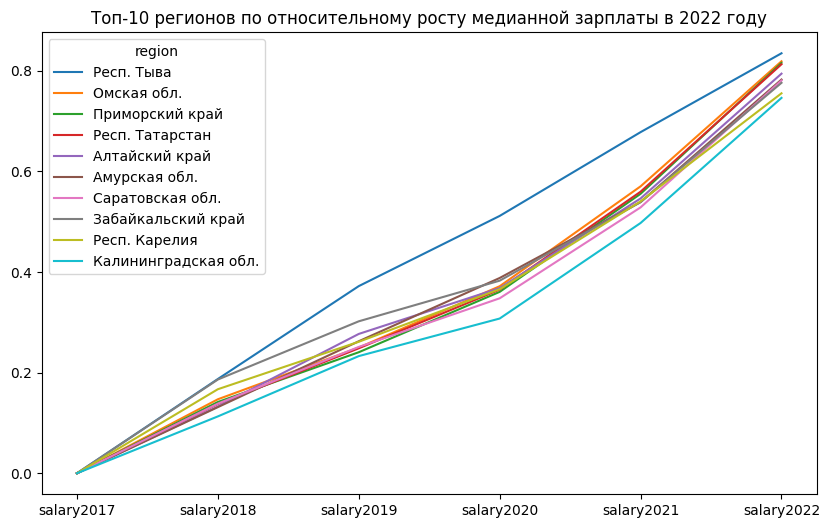

In [129]:
salary_change_area.T.plot(figsize=(10, 6))
plt.title('Топ-10 регионов по относительному росту медианной зарплаты в 2022 году')
plt.show()

Наиболее высокий рост зарплаты в республике Тыва, рост составил 83,5%, в 2022 году зарплата составила 33540 рублей, что на уровне медианной зарплаты в Сибирском округе

In [130]:
# группировка данных о зарплате по регионам деятельности
job_salary=grouped_salary('category')
# расчет роста зарплаты относительно 2017 года
salary_change_job=(job_salary.sub(job_salary['salary2017'], axis=0)).div(job_salary['salary2017'], axis=0)
# топ-10 категорий деятельности по росту зарплаты в 2022 году
salary_change_job=salary_change_job.sort_values(by='salary2022', ascending=False).head(10)

In [135]:
job_salary[job_salary.index=='Курьеры']

salary2017   salary2018    salary2019   salary2020    salary2021  \
category                                                                       
Курьеры   12491.855082  14709.15125  16011.664022  16928.74164  18011.875202   

            salary2022  
category                
Курьеры   23045.306512

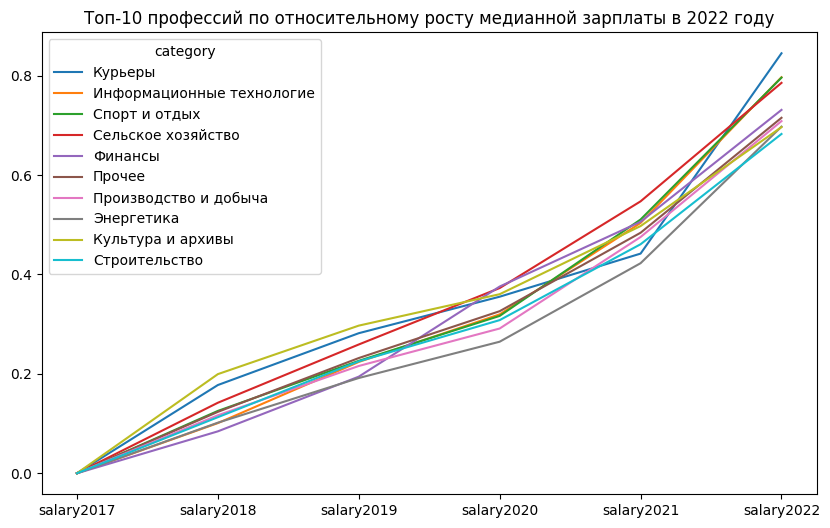

In [132]:
salary_change_job.T.plot(figsize=(10, 6))
plt.title('Топ-10 профессий по относительному росту медианной зарплаты в 2022 году')
plt.show()

Наибольший рост зарплаты у курьеров, рост составил 84,5%, при этом медианная зарплата составляет 23 тыс. руб., что ниже медианной зарплаты по стране

**Выводы по относительным изменениям количества рабочих мест и зарплате:**
- Байконур демонстрирует наибольший относительный рост количества рабочих мест среди всех регионов, что может быть связано с масштабными проектами или инвестициями в инфраструктуру и космическую отрасль
- Профессия курьеров демонстрирует наибольший рост количества рабочих мест, связанного с ростом спроса на данных специалистов
- Наиболее высокий рост зарплаты в республике Тыва, рост составил 83,5%, в 2022 году зарплата составила 33540 рублей, что на уровне медианной зарплаты в Сибирском округе
- Наибольший рост зарплаты у курьеров, рост составил 84,5%, при этом медианная зарплата составляет 23 тыс. руб., что ниже медианной зарплаты по стране

## Анализ высоких зарплат

Для анализа был выбран нижний лимит 95 тыс. рублей, так как он соответствует зарплате 5% населения, верхний лимит был выбран на основе градации зарплат в соответствии с новой ставкой налогообложения, согласно которой доход до 2,4  млн рублей в год облагается налогом 13% 

In [136]:

salary_95_200=data_upd.query('salary2022>95000 and salary2022<=200000')

In [138]:
# количество людей с зарплатой 95-200 тыс по округам
salary_95_200_count=salary_95_200.groupby('FO')['FO'].count()

In [137]:
# общее число населения в округах
data_upd_count=data_upd.groupby('FO')['FO'].count()

In [139]:
# доля населения с зарплатой 95-200 тысяч
salary_95_200_ratio=(salary_95_200_count/data_upd_count*100).sort_values(ascending=False)

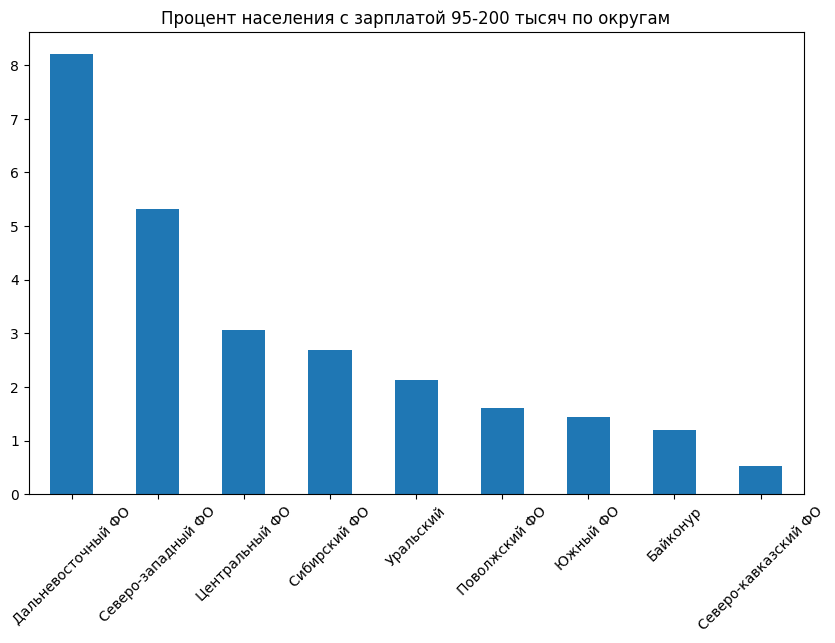

In [178]:
salary_95_200_ratio.plot(kind='bar', figsize=(10,6))
plt.title('Процент населения с зарплатой 95-200 тысяч по округам')
plt.xticks(rotation=45)
plt.xlabel('')
plt.show()

- Дальневосточный ФО: Самый высокий процент населения с зарплатой в диапазоне 95-200 тыс. рублей (около 8%). Это может быть связано с высокой долей работников в добывающей промышленности и высокими северными надбавками.
- Северо-Западный ФО: Второй по величине процент (около 6%), что может быть связано с высокой концентрацией квалифицированных специалистов в крупных городах, таких как Санкт-Петербург.
- Центральный ФО: Процент населения с высокими зарплатами также значителен (около 3%), в основном за счет столицы - Москвы, практически на этом же уровне доля в Сибирском ФО 
- Северо-Кавказский ФО: Наименьший процент населения с зарплатой 95-200 тыс. рублей, что связано с общими экономическими условиями региона.

In [145]:
# доля сотрудников с зарплатой 95-200 тыс. руб. по категориям деятельности
category_counts =salary_95_200['category'].value_counts()/data_upd['category'].value_counts()*100

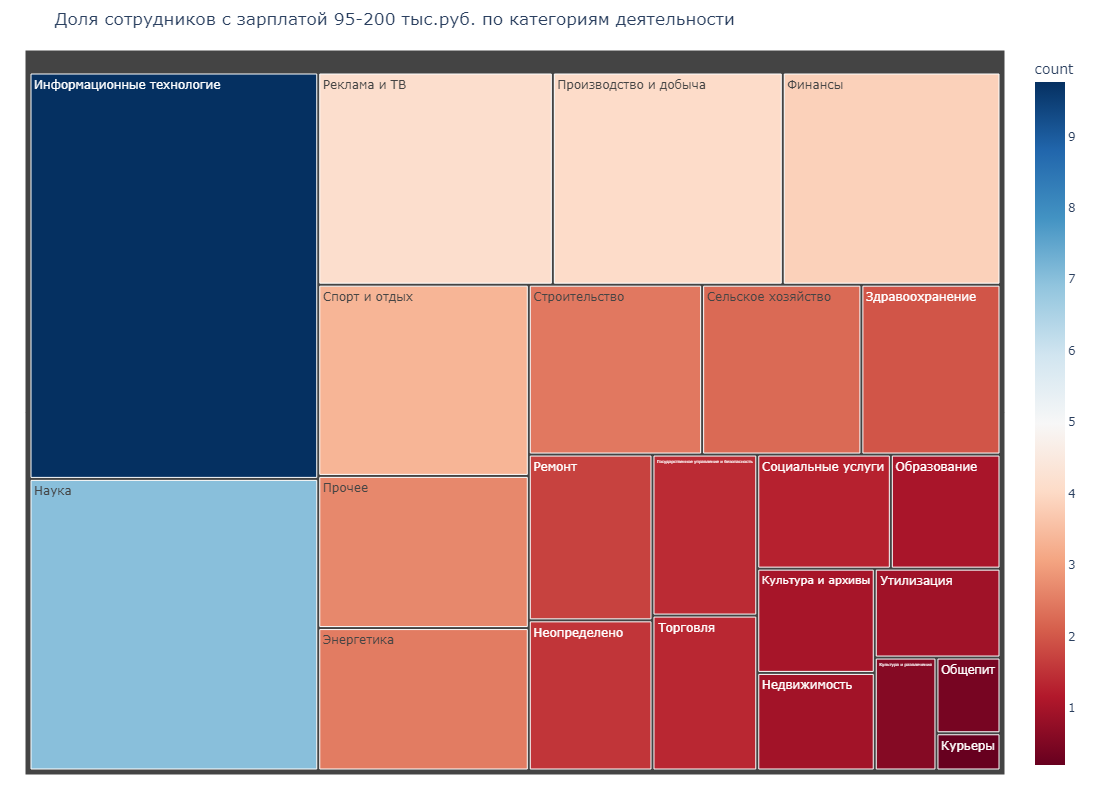

In [165]:
category_counts =(salary_95_200['category'].value_counts()/data_upd['category'].value_counts()*100).reset_index()
category_counts.columns = ['category', 'count']
fig = px.treemap(category_counts, path=['category'], values='count',
                 color='count', hover_data={'category': True, 'count': True},
                 color_continuous_scale='RdBu',
                 title='Доля сотрудников с зарплатой 95-200 тыс.руб. по категориям деятельности')

# Update layout for better visualization
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25), width=1200,  # Set the width of the plot
    height=800)

# Show plot
fig.show()

- Информационные технологии: Лидируют по доле высокооплачиваемых работников, что связано с высоким спросом на IT-специалистов и высокими зарплатами в отрасли.
- Наука: Также демонстрирует высокую долю работников с зарплатой 95-200 тыс. рублей, что связано с высоким уровнем квалификации и специализированными знаниями, необходимыми в этой области
- Производство и добыча: Также значительная доля высокооплачиваемых работников, что связано с важностью этих отраслей для экономики и наличием высоких северных надбавок.
- Реклама и ТВ: высокая доля высокооплачиваемых работников, связанная со значительными бюджетами и инвестициями в данной сфере

In [154]:
salary_95_200=salary_95_200.query('region!=0 and region!="РФ"')

In [155]:
# количество сотрудников с зарплатой 95-200 тыс.руб. по регионам
salary_95_200_region=salary_95_200['region'].value_counts()

In [156]:
# доля сотрудников с зарплатой 95-200 тыс.руб. по регионам
salary_95_200_region_ratio=(salary_95_200_region/data_upd['region'].value_counts()*100).sort_values(ascending=False).reset_index()
salary_95_200_region_ratio.columns=['region', 'ratio']
salary_95_200_region_ratio['region'] = salary_95_200_region_ratio['region'].astype(str)
# топ-15 регионов с зарплатой 95-200 тыс. руб.
salary_95_200_region_ratio=salary_95_200_region_ratio.head(15)

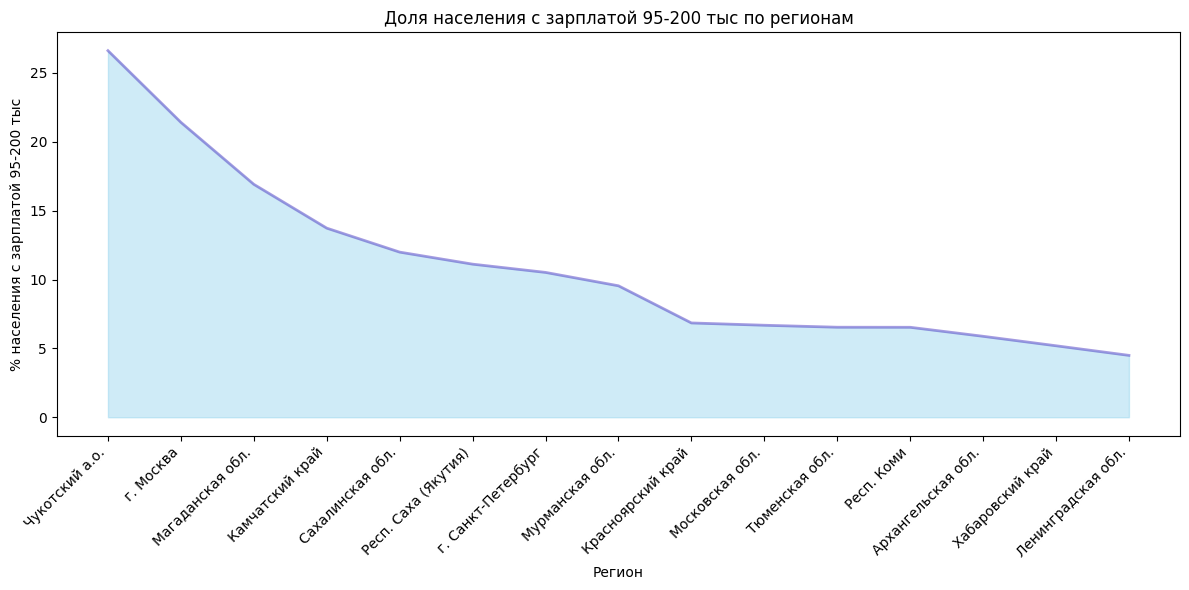

In [157]:
fig, ax = plt.subplots(figsize=(12, 6))

# Create the line plot with filled area
ax.fill_between(salary_95_200_region_ratio['region'], salary_95_200_region_ratio['ratio'], color='skyblue', alpha=0.4)
ax.plot(salary_95_200_region_ratio['region'], salary_95_200_region_ratio['ratio'], color='Slateblue', alpha=0.6, linewidth=2)

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('Доля населения с зарплатой 95-200 тыс по регионам')
plt.xlabel('Регион')
plt.ylabel('% населения с зарплатой 95-200 тыс')

# Show plot
plt.tight_layout()
plt.show()

- Наиболее высокие зарплаты в дальневосточном регионе: Чукотский автономный округ, Магаданская область, Камчатский край и т.д.. Высокие зарплаты обусловлены добывающей промышленностью и сложными условиями работы в этом регионе, а также соответствующими надбавками

- Высокий процент высокооплачиваемых специалистов в Москве , что связано с высоким уровнем жизни, концентрацией крупных компаний и развитой экономикой

- график демонстрирует высокую доля населения с зарплатой 95-200 тыс. руб. в северных и дальневосточных регионах:
Высокие зарплаты в этих регионах могут быть связаны с необходимостью привлечения специалистов для работы в суровых климатических условиях, а также с наличием высокооплачиваемых вакансий в нефтегазовой и добывающей отраслях. Высокая доля населения с зарплатой в указанном диапазоне в Москве и Санкт-Петербурге,а также областях подтверждает их статус как ведущих экономических и финансовых центров России.





Диапазон 200-416 тысяч  был выбран для анализа на основе градации зарплат в соответствии с новой ставкой налогообложения, согласно которой доход от 2,4 до 5 млн рублей в год облагается налогом 15%

In [158]:
salary_200_416=data_upd.query('salary2022>200000 and salary2022<=416000')

In [159]:
# количество населения с зарплатой 200-416 тыс. руб. по федеральным округам
salary_200_416_count=salary_200_416.groupby('FO')['FO'].count()

In [160]:
# доля населения с зарплатой 200-416 тыс. руб.
salary_200_416_ratio=(salary_200_416_count/data_upd_count*100).sort_values(ascending=False)

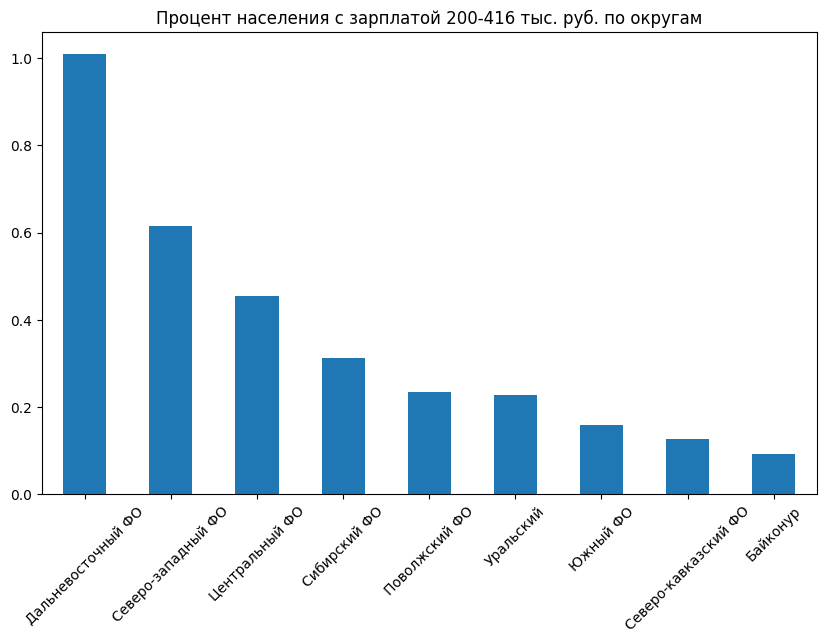

In [179]:
salary_200_416_ratio.plot(kind='bar', figsize=(10,6))
plt.title('Процент населения с зарплатой 200-416 тыс. руб. по округам')
plt.xticks(rotation=45)
plt.xlabel('')
plt.show()

- Дальневосточный ФО: Самый высокий процент населения с зарплатой в диапазоне 200-416 тыс. рублей. Это объясняется значительной долей работников в высокооплачиваемых отраслях, таких как добыча полезных ископаемых, и высокими северными надбавками.
- Северо-Западный ФО: Второй по величине процент, что связано с высокой концентрацией высококвалифицированных специалистов в крупных городах, таких как Санкт-Петербург
- Центральный ФО: Третий по величине процент населения с высокими зарплатами, в основном за счет Москвы.
- Другие округа: Сибирский, Уральский, Приволжский, Южный и Северо-Кавказский ФО имеют менее значительные показатели.


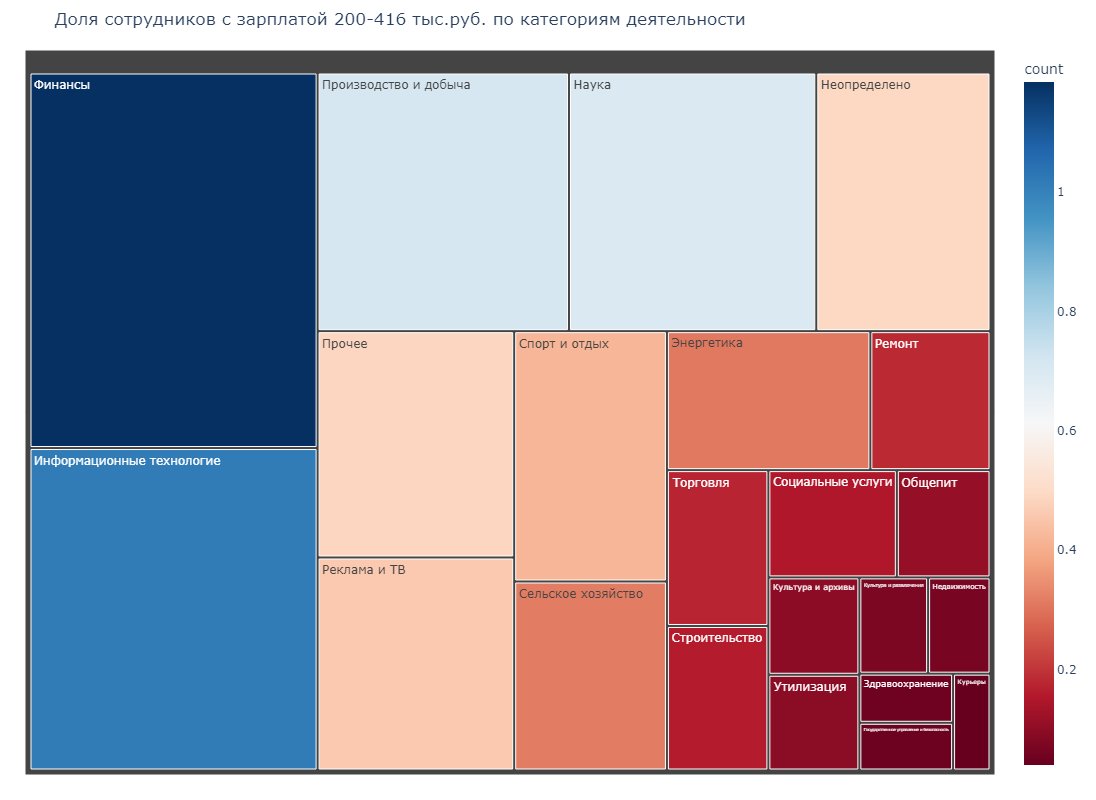

In [166]:
category_counts =(salary_200_416['category'].value_counts()/data_upd['category'].value_counts()*100).reset_index()
category_counts.columns = ['category', 'count']
fig = px.treemap(category_counts, path=['category'], values='count',
                 color='count', hover_data={'category': True, 'count': True},
                 color_continuous_scale='RdBu',
                 title='Доля сотрудников с зарплатой 200-416 тыс.руб. по категориям деятельности')

# Update layout for better visualization
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25), width=1200,  # Set the width of the plot
    height=800)

# Show plot
fig.show()

- Финансы: Высокие зарплаты в финансовом секторе обусловлены конкуренцией за квалифицированных специалистов и высоким уровнем ответственности в этой области.
- Информационные технологии: Высокий спрос на IT-специалистов и дефицит квалифицированных кадров способствуют увеличению зарплат.
- Производство и добыча: Также значительная доля высокооплачиваемых работников, что связано с важностью этих отраслей для экономики и наличием высоких северных надбавок.
- Наука: Демонстрирует высокую долю работников с зарплатой 200-416 тыс. рублей, что связано с высокими требованиями к квалификации и уровню образования.
- Другие категории: Спорт и отдых, реклама и ТВ, энергетика и сельское хозяйство также представлены, но с меньшей долей высокооплачиваемых работников.

In [169]:
salary_200_416=salary_200_416.query('region!=0 and region!="РФ"')

In [170]:
# доля сотрудников с зарплатой 200-416 тыс.руб. по регионам
salary_200_416_region=salary_200_416['region'].value_counts()
salary_200_416_region_ratio=(salary_200_416_region/data_upd['region'].value_counts()*100).sort_values(ascending=False).reset_index()
salary_200_416_region_ratio.columns=['region', 'ratio']
salary_200_416_region_ratio['region'] = salary_200_416_region_ratio['region'].astype(str)
# топ-15 регионов с зарплатой 200-416 тыс. руб.
salary_200_416_region_ratio=salary_200_416_region_ratio.head(15)

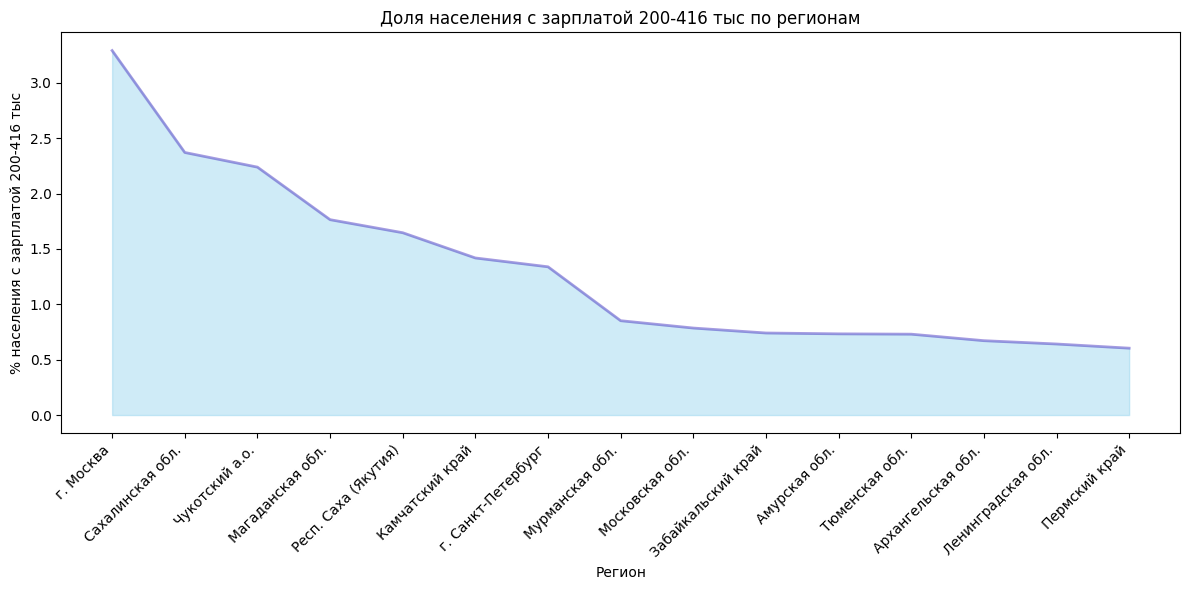

In [171]:
fig, ax = plt.subplots(figsize=(12, 6))

# Create the line plot with filled area
ax.fill_between(salary_200_416_region_ratio['region'], salary_200_416_region_ratio['ratio'], color='skyblue', alpha=0.4)
ax.plot(salary_200_416_region_ratio['region'], salary_200_416_region_ratio['ratio'], color='Slateblue', alpha=0.6, linewidth=2)

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('Доля населения с зарплатой 200-416 тыс по регионам')
plt.xlabel('Регион')
plt.ylabel('% населения с зарплатой 200-416 тыс')

# Show plot
plt.tight_layout()
plt.show()

- Москва и Санкт-Петербург: имеют высокие доли населения с высокими зарплатами, что связано с концентрацией крупных компаний, развитой экономикой и высоким уровнем жизни.
- Сахалинская область и Чукотский автономный округ: Высокие зарплаты обусловлены добывающей промышленностью и сложными условиями работы.
- график демонстрирует, что наибольшая доля населения с данной зарплатой сосредоточена в северных и дальневосточных региона 


Диапазон 416 тыс. - 1,7 млн. рублей был выбран для анализа на основе градации зарплат в соответствии с новой ставкой налогообложения, согласно которой доход от 5 до 20 млн рублей в год облагается налогом 20%

In [172]:
salary_416_1700=data_upd.query('salary2022>416000 and salary2022<=1700000')

In [173]:
# количество населения с зарплатой 415 тыс.-1,7 млн. руб.
salary_416_1700_count=salary_416_1700.groupby('FO')['FO'].count()

In [174]:
salary_416_1700_ratio=(salary_416_1700_count/data_upd_count*100).sort_values(ascending=False)

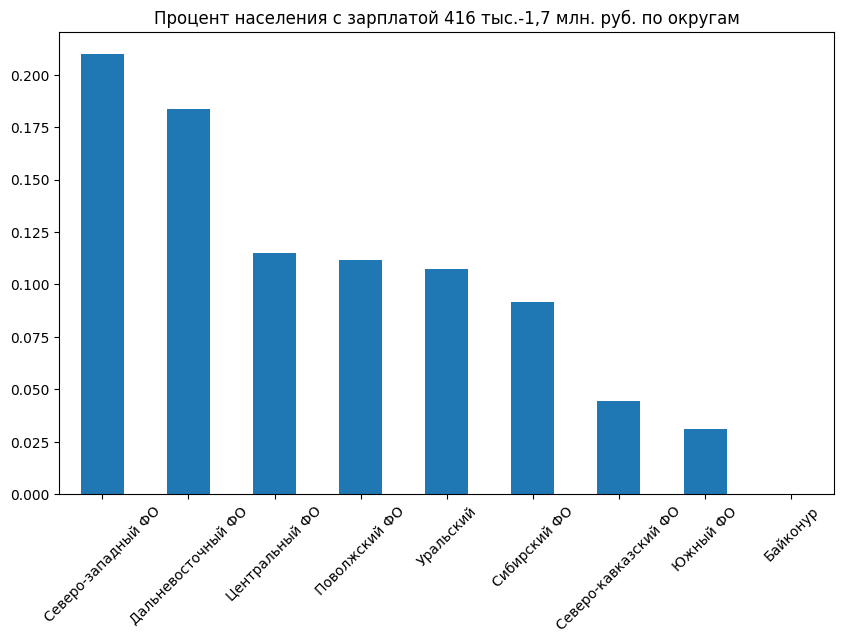

In [180]:
salary_416_1700_ratio.plot(kind='bar', figsize=(10,6))
plt.title('Процент населения с зарплатой 416 тыс.-1,7 млн. руб. по округам')
plt.xticks(rotation=45)
plt.xlabel('')
plt.show()

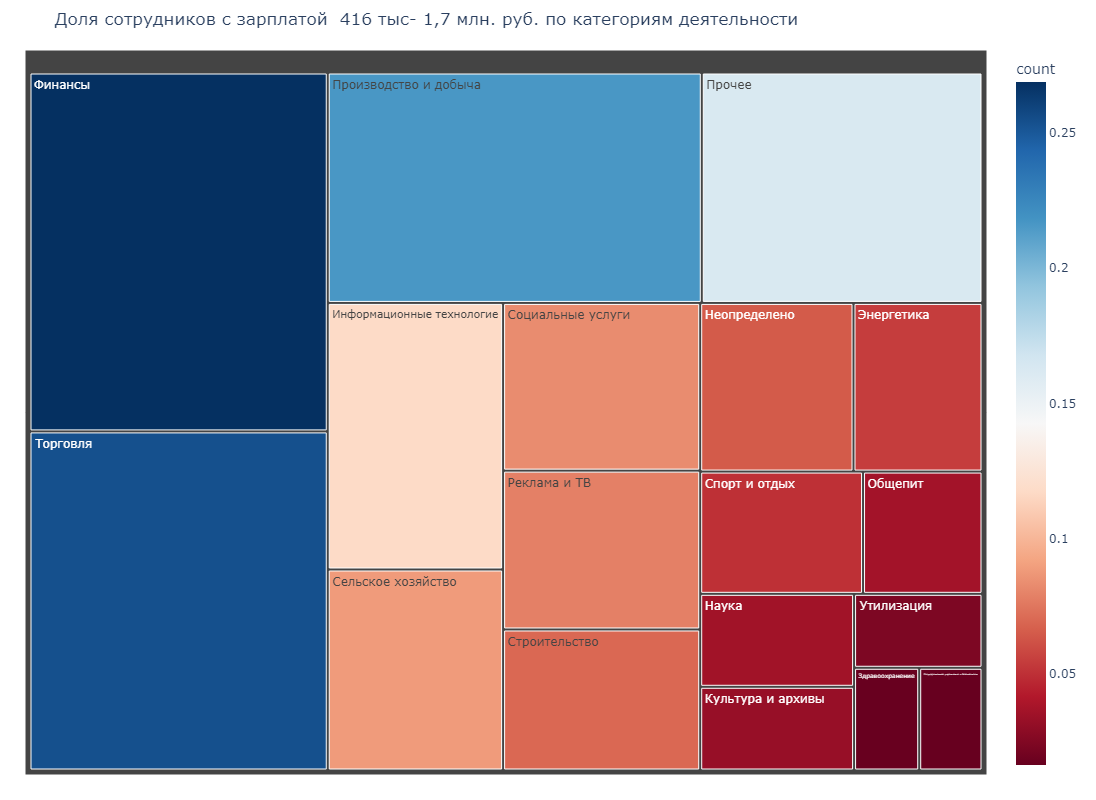

In [183]:
category_counts =(salary_416_1700['category'].value_counts()/data_upd['category'].value_counts()*100).reset_index()
category_counts.columns = ['category', 'count']
fig = px.treemap(category_counts, path=['category'], values='count',
                 color='count', hover_data={'category': True, 'count': True},
                 color_continuous_scale='RdBu',
                 title='Доля сотрудников с зарплатой  416 тыс- 1,7 млн. руб. по категориям деятельности')


fig.update_layout(margin=dict(t=50, l=25, r=25, b=25), width=1200,  # Set the width of the plot
    height=800)

# Show plot
fig.show()

- Финансы: Лидируют по доле высокооплачиваемых работников, что связано с высокой конкуренцией за квалифицированных специалистов в финансовом секторе.
- Торговля: Значительная доля высокооплачиваемых работников, что отражает высокую доходность этих отраслей.
- Производство и добыча: Высокие зарплаты обусловлены важностью этих отраслей для экономики и сложными условиями работы.
- Прочее: Включает разнообразные отрасли, что показывает, что высокие зарплаты можно найти в различных сферах деятельности.


In [184]:
# доля сотрудников с зарплатой  416 тыс-1,7 млн.руб. по регионам
salary_416_1700_region=salary_416_1700['region'].value_counts()
salary_416_1700_region_ratio=(salary_416_1700_region/data_upd['region'].value_counts()*100).sort_values(ascending=False).reset_index()
salary_416_1700_region_ratio.columns=['region', 'ratio']
salary_416_1700_region_ratio['region'] = salary_416_1700_region_ratio['region'].astype(str)
# топ-15 регионов с зарплатой 416 тыс-1,7 млн.руб.
salary_416_1700_region_ratio=salary_416_1700_region_ratio.head(15)

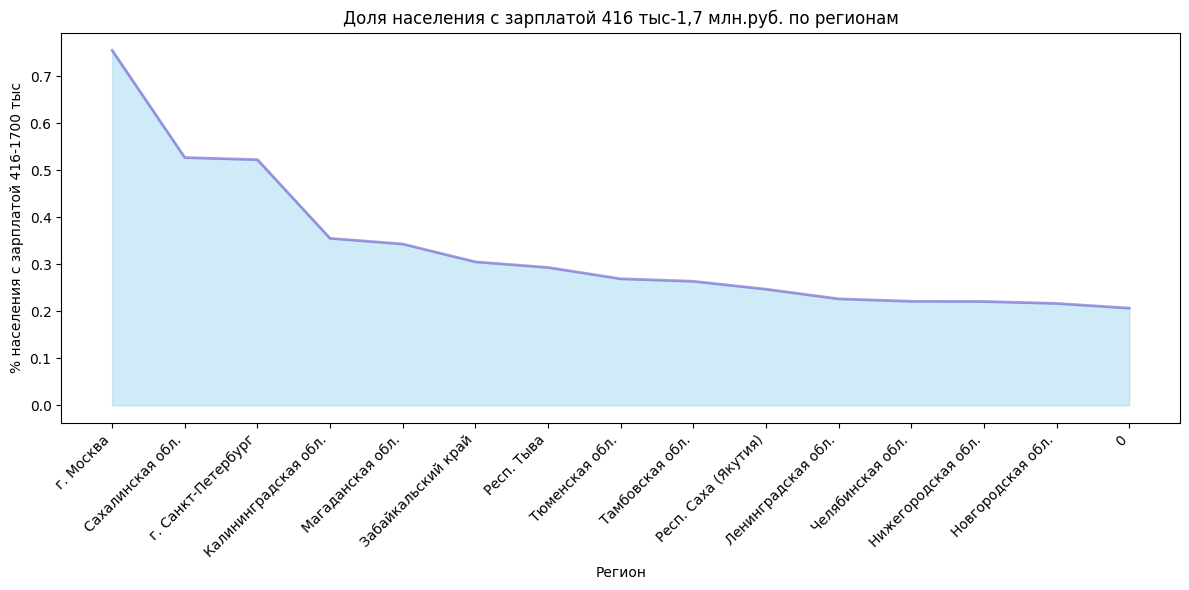

In [198]:
fig, ax = plt.subplots(figsize=(12, 6))

# Create the line plot with filled area
ax.fill_between(salary_416_1700_region_ratio['region'], salary_416_1700_region_ratio['ratio'], color='skyblue', alpha=0.4)
ax.plot(salary_416_1700_region_ratio['region'], salary_416_1700_region_ratio['ratio'], color='Slateblue', alpha=0.6, linewidth=2)


plt.xticks(rotation=45, ha='right')
plt.title('Доля населения с зарплатой 416 тыс-1,7 млн.руб. по регионам')
plt.xlabel('Регион')
plt.ylabel('% населения с зарплатой 416-1700 тыс')

# Show plot
plt.tight_layout()
plt.show()

- Москва и Санкт-Петербург имеют наиболее высокие доли населения с высокими зарплатами, что связано с высоким уровнем жизни и концентрацией крупных компаний.
- Сахалинская область: Высокие зарплаты также связаны с наличием крупных промышленных и добывающих компаний.

Данный диапазон для анализа включает в себя сотрудников, зарабатывающих более 20 млн. рублей в год

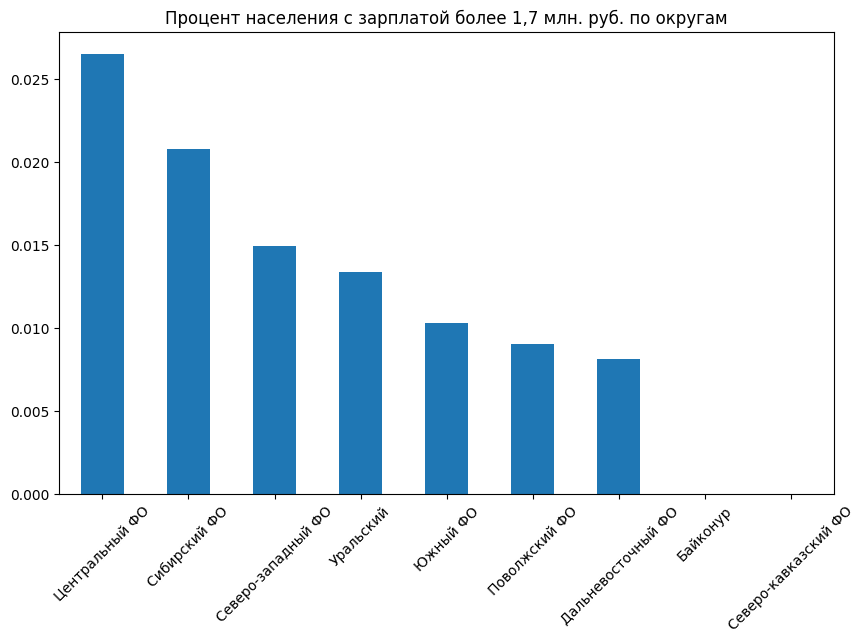

In [189]:
salary_1700=data_upd.query('salary2022>1700000')
# количество сотрудников с зарплатой более 1,7 млн.руб. по регионам
salary_1700_count=salary_1700.groupby('FO')['FO'].count()
# доля сотрудников с зарплатой более 1,7 млн.руб.
salary_1700_ratio=(salary_1700_count/data_upd_count*100).sort_values(ascending=False)
salary_1700_ratio.plot(kind='bar', figsize=(10,6))
plt.title('Процент населения с зарплатой более 1,7 млн. руб. по округам')
plt.xticks(rotation=45)
plt.xlabel('')
plt.show()

- Центральный ФО: Самый высокий процент населения с зарплатой более 1,7 млн рублей, что связано с высоким уровнем жизни и концентрацией крупных компаний в Москве.
- Сибирский и Уральский ФО: Заметный процент высокооплачиваемых работников, что может быть связано с наличием крупных промышленных предприятий.
- Северо-Западный ФО: Высокие зарплаты в этом округе также связаны с наличием крупных компаний и высокими доходами в Санкт-Петербурге.
- во всех округах доля сотрудников с данной зарплатой крайне мала

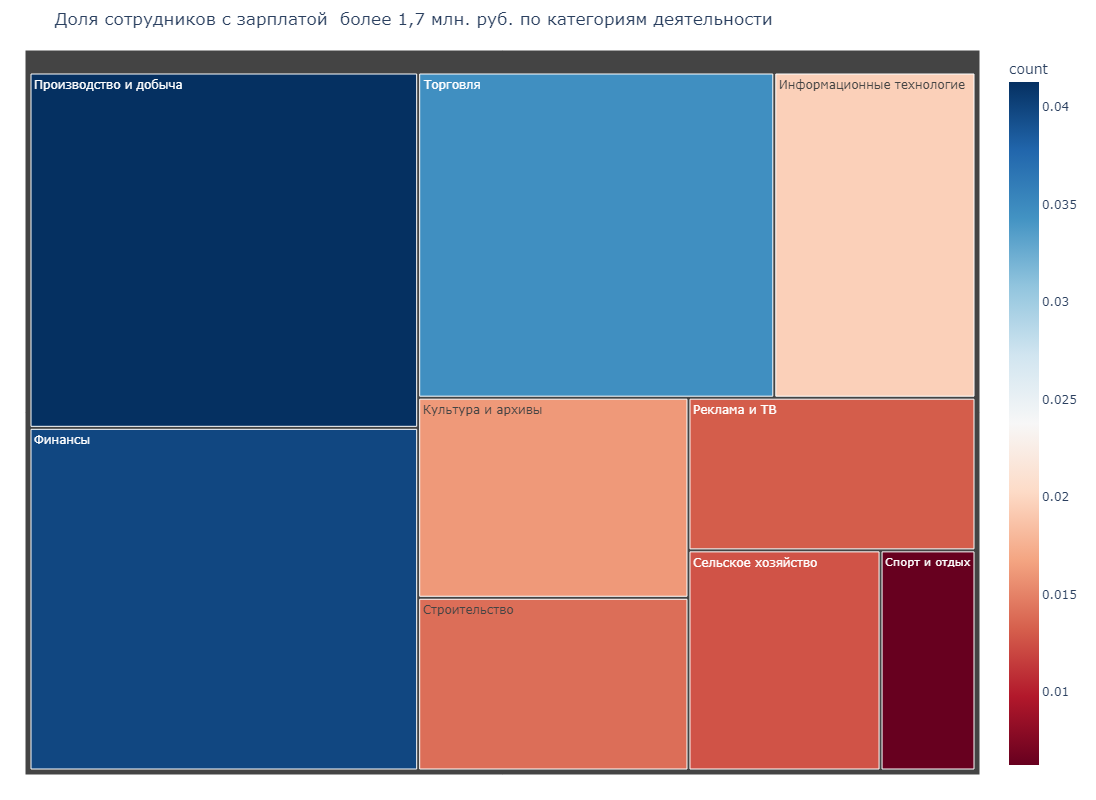

In [192]:
category_counts =(salary_1700['category'].value_counts()/data_upd['category'].value_counts()*100).reset_index()
category_counts.columns = ['category', 'count']
fig = px.treemap(category_counts, path=['category'], values='count',
                 color='count', hover_data={'category': True, 'count': True},
                 color_continuous_scale='RdBu',
                 title='Доля сотрудников с зарплатой  более 1,7 млн. руб. по категориям деятельности')


fig.update_layout(margin=dict(t=50, l=25, r=25, b=25), width=1200,  # Set the width of the plot
    height=800)

# Show plot
fig.show()

- Производство и добыча: Лидируют по доле высокооплачиваемых работников, что связано с важностью этих отраслей для экономики и высокими зарплатами в добывающих компаниях.
- Финансы: наиболее высокая доля высокооплачиваемых работников, что связано с высокой доходностью и конкуренцией за квалифицированных специалистов.
- Торговля: Значительная доля высокооплачиваемых работников, что отражает высокую доходность этих отраслей.

In [195]:
salary_1700=salary_1700.query('region!=0 and region!="РФ"')

In [196]:
# доля сотрудников с зарплатой  более 1,7 млн.руб. по регионам
salary_1700_region=salary_1700['region'].value_counts()
salary_1700_region_ratio=(salary_1700_region/data_upd['region'].value_counts()*100).sort_values(ascending=False).reset_index()
salary_1700_region_ratio.columns=['region', 'ratio']
salary_1700_region_ratio['region'] = salary_1700_region_ratio['region'].astype(str)
salary_1700_region_ratio=salary_1700_region_ratio.head(15)

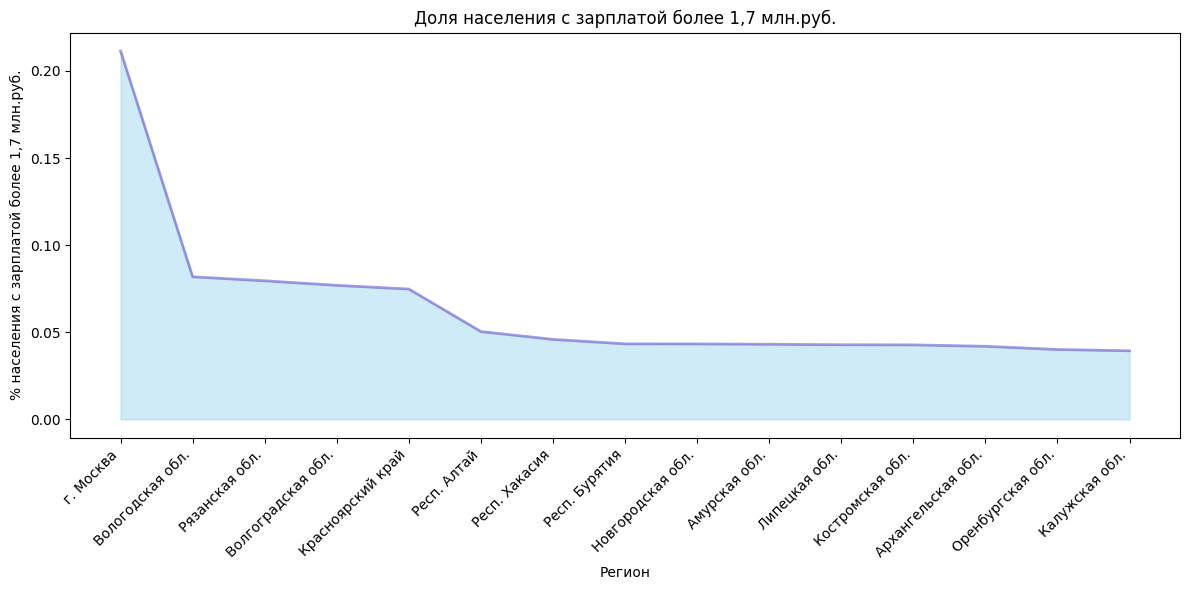

In [200]:
fig, ax = plt.subplots(figsize=(12, 6))

# Create the line plot with filled area
ax.fill_between(salary_1700_region_ratio['region'], salary_1700_region_ratio['ratio'], color='skyblue', alpha=0.4)
ax.plot(salary_1700_region_ratio['region'], salary_1700_region_ratio['ratio'], color='Slateblue', alpha=0.6, linewidth=2)

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('Доля населения с зарплатой более 1,7 млн.руб.')
plt.xlabel('Регион')
plt.ylabel('% населения с зарплатой более 1,7 млн.руб.')

# Show plot
plt.tight_layout()
plt.show()

Москва: Лидер по доле населения с высокими зарплатами, что связано с высоким уровнем жизни, концентрацией крупных компаний и наличием высокооплачиваемых вакансий. В остальных доля существенно ниже

**Выводы по проекту**:
- в возрастных группах 35-39, 40-44, 45-49, 50-54 наиболее высокое среднее количество рабочих мест, что соответствует наиболее опытному и активному трудоспособному населению
- в возрастных группах 30-34, 25-29 снижается среднее количество рабочих мест, что свидетельствует о снижении занятности у молодых и начинающих специалистов
- в группах от 55 до 69 лет наиболее высокое среднее количество рабочих мест в группе 55-59, число снижается с 2017 по 2022, что свидетельствует о снижении занятости в предпенсионном возрасте
- Наиболее высокий ФОТ в возрастных группах от 30 до 54 лет
- во всех возрастных группах наблюдается рост ФОТ
- во всех возрастных группах медианная зарплата демонстрирует рост
- наиболее высокая медианная зарплата в возрастных группах 40-44 и 45-49 лет, что соответствует более опытным специалистам
- во всех возрастных группах "Производство и добыча" является наиболее популярной категорией
- во всех возрастных группах распределение занятости по категориям деятельности аналогично друг другу
- наименее популярная категория "Курьеры"
- Наибольший процент занятости приходится на центральный и поволжский федеральные округа, так как в данных округах наибольшее число населения
- Во всех федеральных округах наблюдается рост медианной зарплаты. 
- Наиболее высокая медианная зарплата в Дальневосточном федеральном округе, что объясняется особенностями рынка труда в данном регионе - сложность климатических условий, меры помощи от государства, дефицит рабочей силы, а  также развитие наиболее  прибыльных отраслей добычи нефти, газа, угля.
- Cамая низкая зарплата приходится на Северо-кавказский федеральный округ. Северо-кавказский регион традиционно относится к наиболее бедным регионам России с высокой долей безработицы, отсутствием крупных предприятий, высокой долей населения, занятой в сельском хозяйстве и малом бизнесе
-  Выше всего рост медианной зарплаты в Сибирском федеральном округе (73%)
- Учитывая отсутствие данных в Уральском ФО, самый низкий рост зарплат в Северо-кавказском ФО и Байконуре (около 50%)
- Самая низкая зарплата в республике Ингушетия, в этом же регионе самый низкий рост зарплаты с 2017 года (39%)
- Самая высокая зарплата в Чукотском а.о. (79909 руб)
- Наиболее высокий рост зарплат с 2017 года был в республике Татарстан, рост 81%
- Во всех регионах в производстве и добычи занят основной процент трудящихся, далее идет спорт и строительство
- Во всех регионах наибольшее количество людей занято в производстве пищевых продуктов
- Байконур демонстрирует наибольший относительный рост количества рабочих мест среди всех регионов, что может быть связано с масштабными проектами или инвестициями в инфраструктуру и космическую отрасль
- Профессия курьеров демонстрирует наибольший рост количества рабочих мест, связанного с ростом спроса на данных специалистов
- Наиболее высокий рост зарплаты в республике Тыва, рост составил 83,5%, в 2022 году зарплата составила 33540 рублей, что на уровне медианной зарплаты в Сибирском округе
- Наибольший рост зарплаты у курьеров, рост составил 84,5%, при этом медианная зарплата составляет 23 тыс. руб., что ниже медианной зарплаты по стране
- Зарплаты выше 95 тыс.руб. наиболее представлены в дальневосточных и северных регионах, а также в Москве и Санкт-Петербурге
- Наиболее высокооплачиваемые профессии в сфере информационных технологий, науке, производстве и добычи, финансах и торговле